# Maestría en Inteligencia Artificial Aplicada


## Tecnológico de Monterrey

### Prof. Luis Eduardo Falcón Morales

**Nombre:** Carlos Eduardo García García 
**Matrícula:** A01795206

1. Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).

### Employee attrition problem

Employee attrition es  el problema cuando tu fuerza de trabajo empieza a reducirse y no la repones.

Entre los posibles causas puede ser: jubilaciones, renuncias, despidos, entre otros.

Este problema es malo cuando la empresa no desea perder talentos de alto valor que suele irse por razones como: 
* Insatisfacción con el empleo
* Cambio de carrera
* Moverse a otra ciudad
* Razones personales o de salud
* Nuevos empleos
* Etc.

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def printResponse(response: str):
    print(bcolors.HEADER + response + bcolors.ENDC)

pd.set_option('display.max_columns', None)

In [301]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=",")
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


2. Carga la base de datos y realiza los análisis necesarios para responder a las siguientes
preguntas:
    - ¿Cuántas y cuáles de las variables son numéricas?
        1. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?
        2. ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)?
        3. De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden anular del problema? Justifica tu respuesta.
    - ¿Cuántas y cuáles de las variables son categóricas?
        1. ¿Cuántas y cuáles de estas variables son binarias?
        2. ¿Cuántas y cuáles de estas variables son nominales? Indica el total de niveles que tiene cada una de estas variables.
        3. ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles que tiene cada una de estas variables.
        4. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden anular del problema? Justifica tu respuesta.
    - En esta base de datos y con base a la información dada, ¿existe alguna o algunas variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y por qué?
    - De existir, elimina del problema todas las variables que consideraste que no están aportando información alguna.

In [302]:
#df.select_dtypes(exclude='number').head(20)
for col in df.select_dtypes(exclude='number'):
  print(col, df[col].unique())

print(df['StandardHours'].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']
[80]


In [303]:
numericColumns = df.select_dtypes(include='number').columns.to_list()
integerColumns = df.select_dtypes(include=[np.integer]).columns.to_list()
floatColumns = df.select_dtypes(include=[np.float64]).columns.to_list()

categoricColumns = df.select_dtypes(include='object').columns.to_list()
nominalValues = []

for col in df.select_dtypes(exclude='number'):
  if (len(df[col].unique()) < 3):
    nominalValues.append(col)

#Department, EducationField, JobRole, MaritalStatus, Gender 

printResponse('A) ¿Cuántas y cuáles de las variables son numéricas?')
print('Son {answ1} en total y son las columnas: {answ2}'.format(answ1=len(numericColumns), answ2=", ".join(numericColumns)))
printResponse('\t1. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?')
print('\tSon {answ1} en total y son las columnas: {answ2}'.format(answ1=len(integerColumns), answ2=", ".join(integerColumns)))
printResponse('\t2. ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)?\t{answ}'.format(answ=''))
print('\tSon {answ1} en total y son las columnas: {answ2}'.format(answ1=len(floatColumns), answ2=", ".join(floatColumns)))
printResponse('\t3. De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden anular del problema? Justifica tu respuesta.')
print('\tEn mi opinion se deben eliminar 4, EmployeeCount, EmployeeNumber, StandardHours y DailyRate deben ser eliminados las primeras dos por no aportar nada relevante a la posible solución y podría distorcionar el resultado del algoritmo, StandardHours puede ser ignorado ya que solo se cuenta con un solo posible valor en toda la muestra con 80, por último, el DailyRate puede ser ignorado debido a que ya se cuenta con el MonthlyRate el cual además cuenta con el atributo complementario MontlyIncome')

########################
printResponse('\nB) ¿Cuántas y cuáles de las variables son categóricas?')
print('Son {answ1} en total y son las columnas: {answ2}'.format(answ1=len(categoricColumns), answ2=", ".join(categoricColumns)))
printResponse('\t1. ¿Cuántas y cuáles de estas variables son binarias?')
print('\tSon {answ1} en total y son las columnas: {answ2}'.format(answ1=len(nominalValues), answ2=", ".join(nominalValues)))
printResponse('\t2. ¿Cuántas y cuáles de estas variables son nominales? Indica el total de niveles que tiene cada una de estas variables.')
print('\tSon 5 en total y son: Department, EducationField, JobRole, MaritalStatus, Gender')
print('\t\tDepartment con los ({answ2}) posibles valores: {answ}'.format(answ=", ".join(df['Department'].unique()), answ2=len(df['Department'].unique())))
print('\t\tEducationField con los ({answ2}) posibles valores: {answ}'.format(answ=", ".join(df['EducationField'].unique()), answ2=len(df['EducationField'].unique())))
print('\t\tJobRole con los ({answ2}) posibles valores: {answ}'.format(answ=", ".join(df['JobRole'].unique()), answ2=len(df['JobRole'].unique())))
print('\t\tMaritalStatus con los ({answ2}) posibles valores: {answ}'.format(answ=", ".join(df['MaritalStatus'].unique()), answ2=len(df['MaritalStatus'].unique())))
print('\t\tGender con los ({answ2}) posibles valores: {answ}'.format(answ=", ".join(df['Gender'].unique()), answ2=len(df['Gender'].unique())))

#######################
printResponse('\t3. ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles que tiene cada una de estas variables.')
print('\tSon 8 variables ordinales y son: BusinessTravel, Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction, PerformanceRating, WorkLifeBalance')
print('\t\t BusinessTravel con los valores "Travel_Rarely" "Travel_Frequently", "Non-Travel"')
print('\t\t Education tiene los niveles: 1 "Below College" 2 "College" 3 "Bachelor" 4 "Master" 5 "Doctor"')
print('\t\t EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction con los niveles ')
print('\t\t PerformanceRating 1 "Low" 2 "Good" 3 "Excellent" 4 "Outstanding"')
print('\t\t WorkLifeBalance con los niveles 1 "Bad" 2 "Good" 3 "Better" 4 "Best"')

####################### 
printResponse('\t4. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden anular del problema? Justifica tu respuesta.')
print('\tEn mi opinión, se puede eliminar una columna, esta siendo Over18 y porque solo cuenta con el valor Y presente en todas las instancias eliminando su relevancia.')

#######################

printResponse('C) En esta base de datos y con base a la información dada, ¿existe alguna o algunas variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y por qué?')
print('En base a la documentación provista por Kaggle, no hay una clara idea de que este tipo de clasificación sea basada en una encuesta o deliberada por un analista, las posibles variables que puedan ser deliberadas por el analista son: EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance ')
printResponse('D) De existir, elimina del problema todas las variables que consideraste que no están aportando información alguna.')
df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'DailyRate', 'Over18'])
df.head()

A) ¿Cuántas y cuáles de las variables son numéricas?
Son 26 en total y son las columnas: Age, DailyRate, DistanceFromHome, Education, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
	1. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?
	Son 26 en total y son las columnas: Age, DailyRate, DistanceFromHome, Education, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


3. Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”.
    - Despliega la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.

In [304]:
from sklearn.model_selection import train_test_split


df.set_index(pd.Index(range(0, len(df), 1)))
X=df.drop('Attrition',axis=1)
Y=df['Attrition']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.15, shuffle=True, random_state=42, stratify=Y)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.1764705882352941, random_state=8) # 0.1764705882352941 x 0.85 = 0.15


print("Xtrain: {}".format(Xtrain.shape))
print("ytrain: {}".format(ytrain.shape))

print("Xtest: {}".format(Xtest.shape))
print("ytest: {}".format(ytest.shape))

print("Xval: {}".format(Xval.shape))
print("yval: {}".format(yval.shape))

Xtrain: (1028, 29)
ytrain: (1028,)
Xtest: (221, 29)
ytest: (221,)
Xval: (221, 29)
yval: (221,)


4. Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas.
    - Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?
        1. Aplica las transformaciones que hayas determinado realizar, evitando el filtrado de información (data-leakage). A estas nuevas variables transformadas llamarlas XtrainT, XvalT y XtestT.

['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


4. Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas.
	Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?
	Las variables Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel y WorkLifeBalance son valores con valores bien definidos y por lo cual las ignoraremos hasta el punto 6
	Para el resto, notamos en la gran mayoria que tienen una cola cargada a la derecha y podemos usar la transformación Yeo-Johnson en todas nuestras variables restantes para poder moldear la curva a una distribución más Gausiana.
	1. Aplica las transformaciones que hayas determinado realizar, evitando el filtrado de información (data-leakage). A estas nuevas variables transformadas llamarlas XtrainT, XvalT y XtestT.


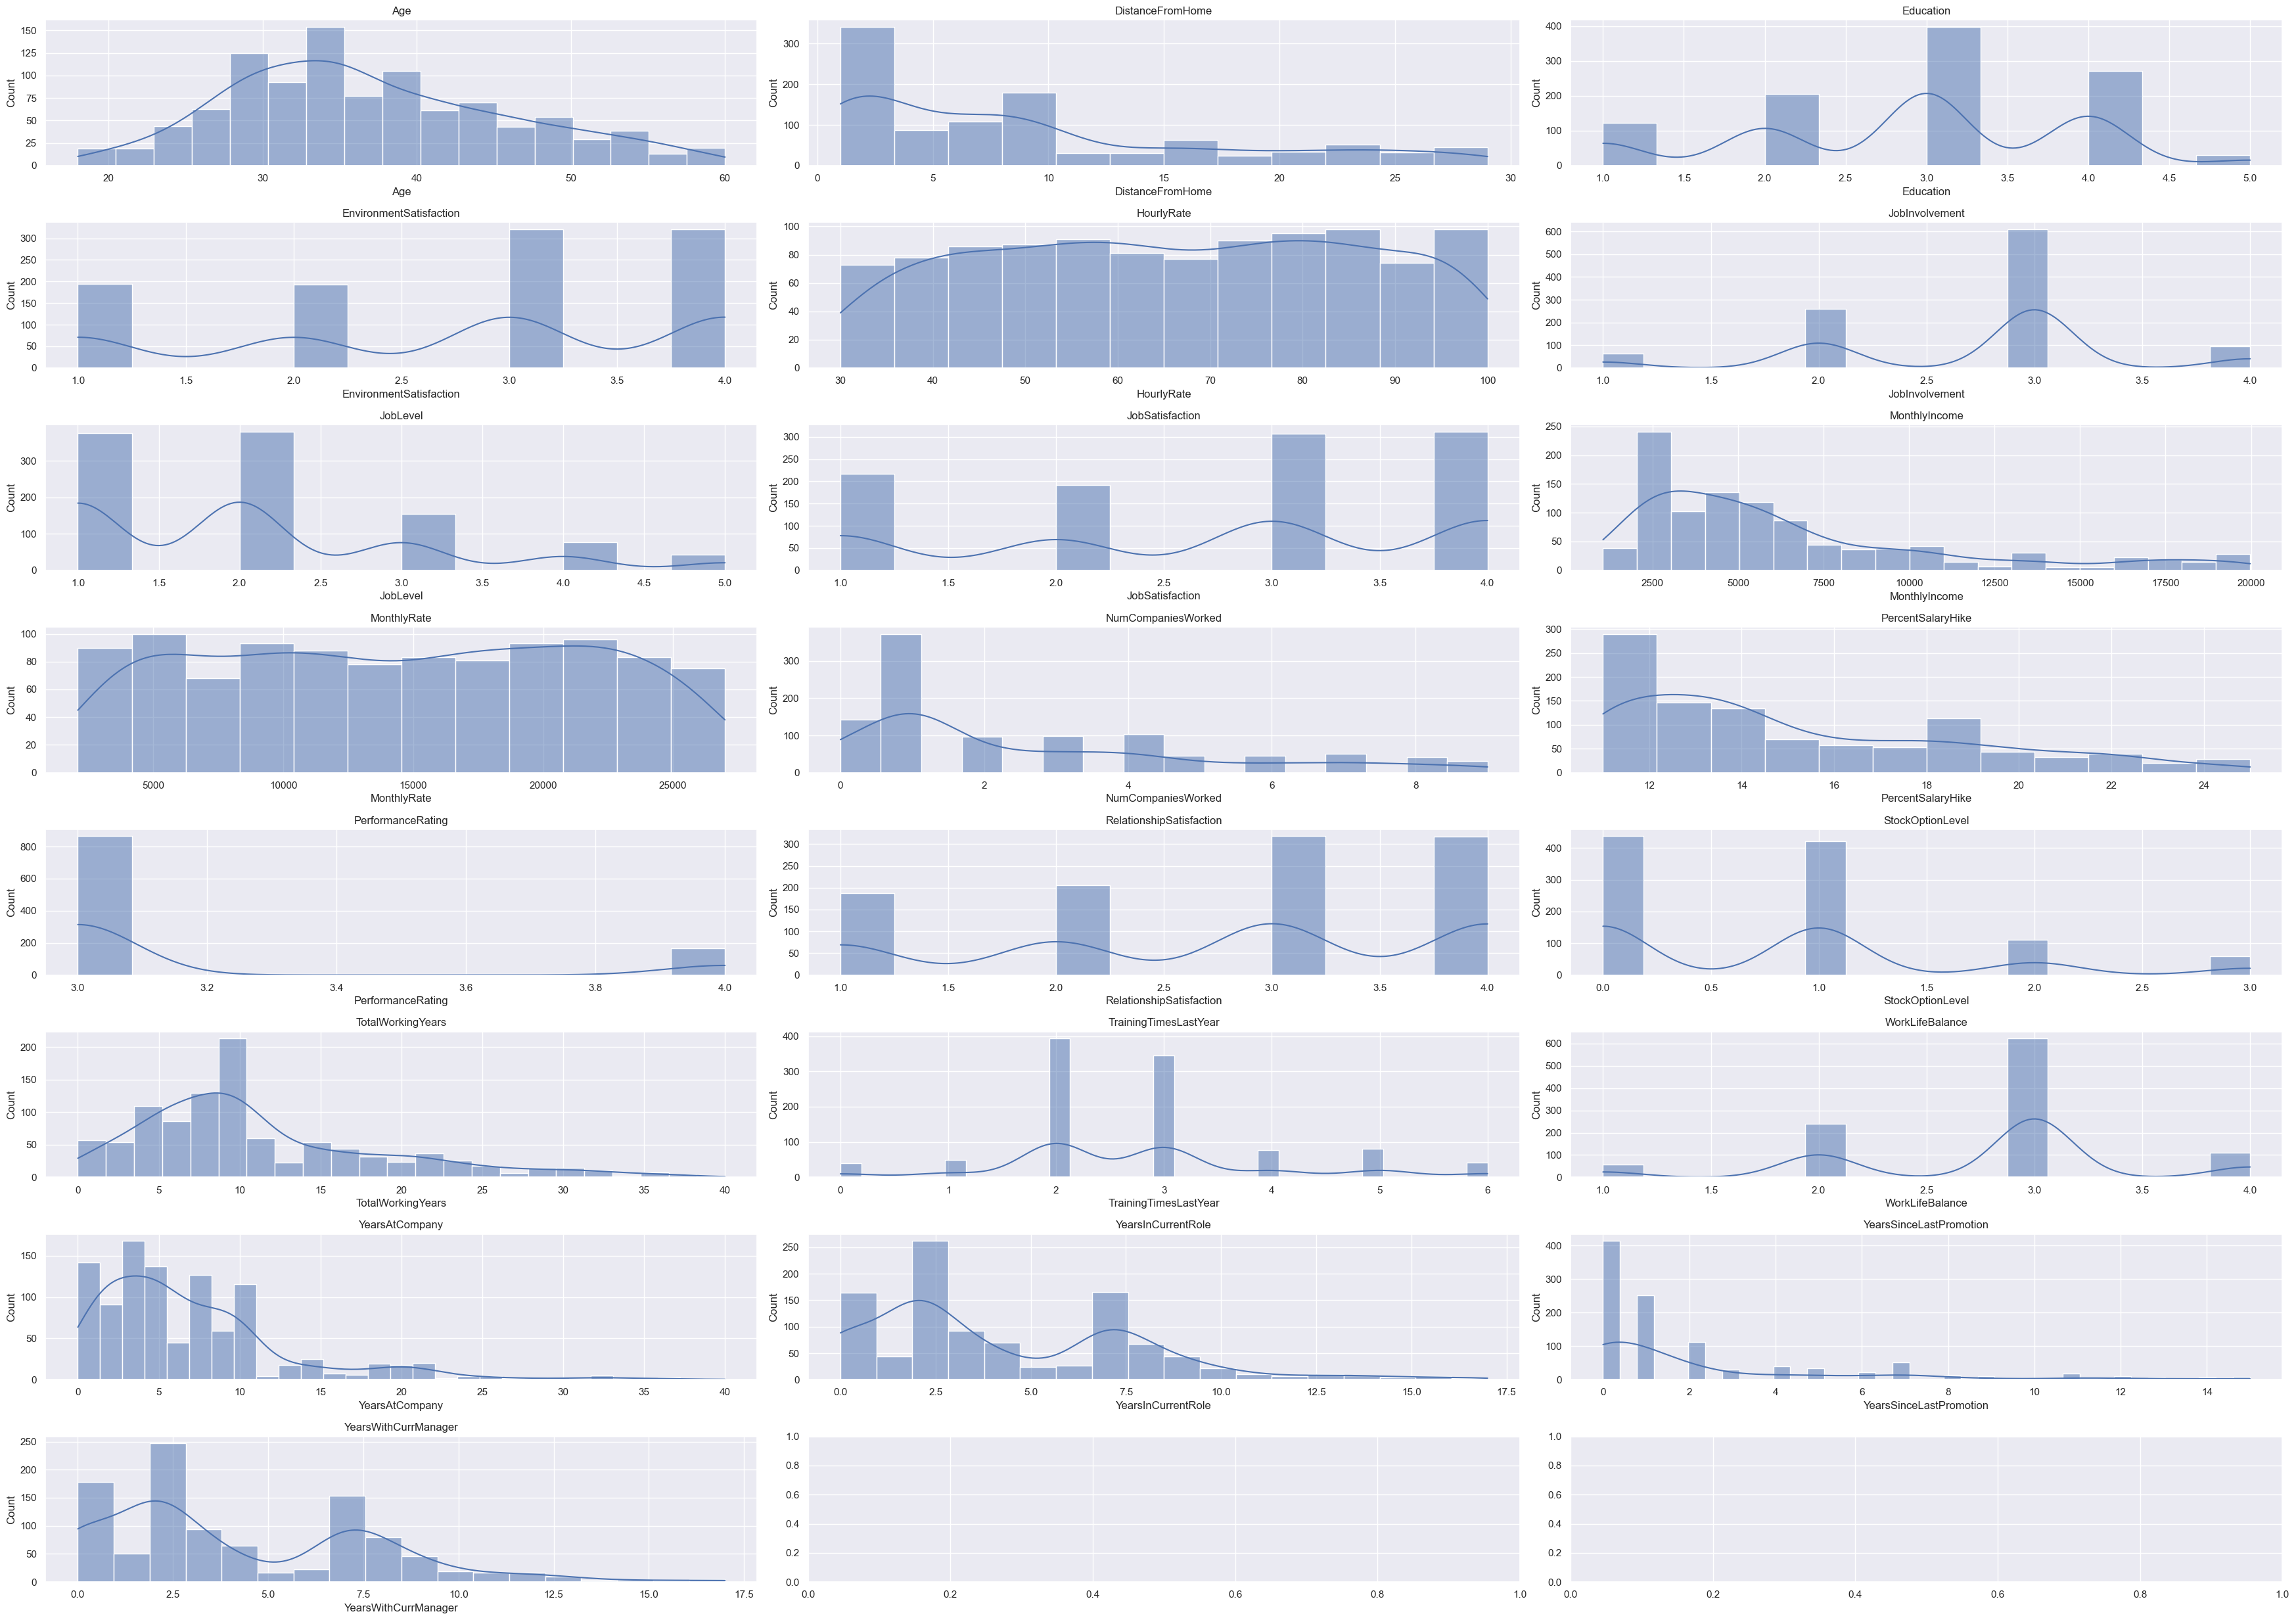

In [305]:
import math
sns.set()
numericColumns = Xtrain.select_dtypes(include='number').columns.to_list()
fig, axes = plt.subplots(math.ceil(len(numericColumns) / 3), 3, figsize=(11.7 * 3, 8.27 * math.ceil(11/4)))
row = 0
column = 0

print(numericColumns)

for col in numericColumns:
    sns.histplot(data=Xtrain, x=col, kde=True, ax=axes[row, column]).set_title(col)
    column = column + 1
    if column == 3:
        row = row + 1
        column = 0

fig.tight_layout()

printResponse("4. Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas.")
printResponse("\tCon base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?")
print("\tLas variables Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel y WorkLifeBalance son valores con valores bien definidos y por lo cual las ignoraremos hasta el punto 6")
print("\tPara el resto, notamos en la gran mayoria que tienen una cola cargada a la derecha y podemos usar la transformación Yeo-Johnson en todas nuestras variables restantes para poder moldear la curva a una distribución más Gausiana.")
printResponse("\t1. Aplica las transformaciones que hayas determinado realizar, evitando el filtrado de información (data-leakage). A estas nuevas variables transformadas llamarlas XtrainT, XvalT y XtestT.")



from sklearn.preprocessing import PowerTransformer
yeoJohnsonTransformableColumns = ['Age', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


yeoTransformer = PowerTransformer(method="yeo-johnson", standardize=False)
yeoTransformer = yeoTransformer.fit(Xtrain[yeoJohnsonTransformableColumns])


XtrainTransformed = yeoTransformer.transform(Xtrain[yeoJohnsonTransformableColumns])
XtrainT = pd.DataFrame(data=XtrainTransformed, columns=yeoJohnsonTransformableColumns, index=Xtrain.index)

XvalTransformed = yeoTransformer.transform(Xval[yeoJohnsonTransformableColumns])
XvalT = pd.DataFrame(data=XvalTransformed, columns=yeoJohnsonTransformableColumns, index=Xval.index)

XtestTransformed = yeoTransformer.transform(Xtest[yeoJohnsonTransformableColumns])
XtestT = pd.DataFrame(data=XtestTransformed, columns=yeoJohnsonTransformableColumns, index=Xtest.index)



5. Aplica la transformación LabelEncoder() de sklearn a todas las variables binarias, evitando el filtrado de información.
    - En particular, obtener la distribución de las clases de la variable de salida “Attrition”. Con base a dicha distribución, ¿podemos considerar que tenemos un problema de datos no balanceados?

5. Aplica la transformación LabelEncoder() de sklearn a todas las variables binarias, evitando el filtrado de información.
	En particular, obtener la distribución de las clases de la variable de salida “Attrition”. Con base a dicha distribución, ¿podemos considerar que tenemos un problema de datos no balanceados?
	Si, tenemos un problema en el porcentaje de cada una de nuestras variables 'Y', es un porcentaje muy pequeño de variables positivas a comparación de las negativas


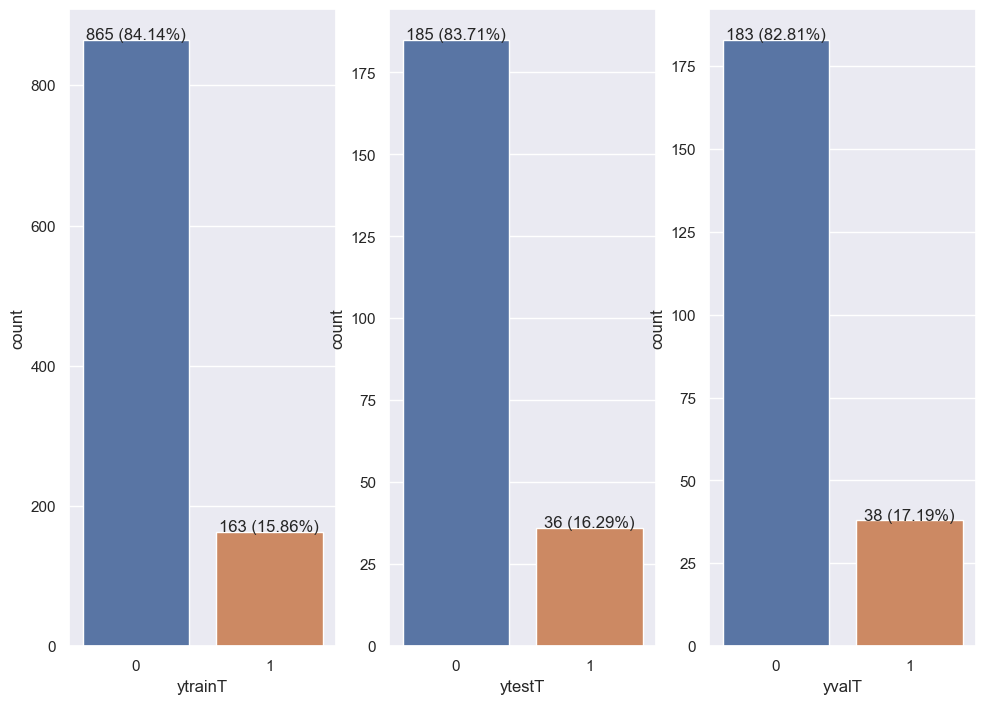

In [306]:
from sklearn.preprocessing import LabelEncoder

genderLabelEncoder = LabelEncoder()
genderLabelEncoder.fit(np.ravel(Xtrain[['Gender']]))


XtrainT.loc[:, 'Gender'] = genderLabelEncoder.transform(np.ravel(Xtrain[['Gender']]))
XvalT.loc[:, 'Gender'] = genderLabelEncoder.transform(np.ravel(Xval[['Gender']]))
XtestT.loc[:, 'Gender'] = genderLabelEncoder.transform(np.ravel(Xtest[['Gender']]))

overtimeLabelEncoder = LabelEncoder()
overtimeLabelEncoder.fit(np.ravel(Xtrain[['OverTime']]))

XtrainT.loc[:, 'OverTime'] = overtimeLabelEncoder.transform(np.ravel(Xtrain[['OverTime']]))
XvalT.loc[:, 'OverTime'] = overtimeLabelEncoder.transform(np.ravel(Xval[['OverTime']]))
XtestT.loc[:, 'OverTime'] = overtimeLabelEncoder.transform(np.ravel(Xtest[['OverTime']]))


attritionLabelEncoder = LabelEncoder()
overtimeLabelEncoder.fit(ytrain)


ytrainT = overtimeLabelEncoder.transform(ytrain)
ytestT = overtimeLabelEncoder.transform(ytest)
yvalT = overtimeLabelEncoder.transform(yval)

dfytrainT = pd.DataFrame(data={'ytrainT': ytrainT})
dfytestT = pd.DataFrame(data={'ytestT': ytestT})
dfyvalT = pd.DataFrame(data={'yvalT': yvalT})

fig, axes = plt.subplots(1, 3, figsize=(11.7, 8.27))

ax = sns.countplot(data=dfytrainT, x='ytrainT', ax=axes[0])
#ax.set_title('ytrainT')
for p in ax.patches:
    height = p.get_height()
    #ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
    ax.text( x = p.get_x()+(p.get_width()/2),
    y = height + 0.1, 
    s = '{:.0f} ({:.2f}%)'.format(height, 100 / len(dfytrainT[['ytrainT']]) * height), 
    ha = 'center') 


ax = sns.countplot(data=dfytestT, x='ytestT', ax=axes[1])
#ax.set_title('ytestT')
for p in ax.patches:
    height = p.get_height()
    
    ax.text( x = p.get_x()+(p.get_width()/2), 
    y = height + 0.1, 
    s = '{:.0f} ({:.2f}%)'.format(height, 100 / len(dfytestT[['ytestT']]) * height), 
    ha = 'center') 

ax = sns.countplot(data=dfyvalT, x='yvalT', ax=axes[2])
#ax.set_title('yvalT')
for p in ax.patches:
    height = p.get_height()
    
    ax.text( x = p.get_x()+(p.get_width()/2), 
    y = height + 0.1,
    s = '{:.0f} ({:.2f}%)'.format(height, 100 / len(dfyvalT[['yvalT']]) * height), 
    ha = 'center') 

printResponse("5. Aplica la transformación LabelEncoder() de sklearn a todas las variables binarias, evitando el filtrado de información.")
printResponse("\tEn particular, obtener la distribución de las clases de la variable de salida “Attrition”. Con base a dicha distribución, ¿podemos considerar que tenemos un problema de datos no balanceados?")
print("\tSi, tenemos un problema en el porcentaje de cada una de nuestras variables 'Y', es un porcentaje muy pequeño de variables positivas a comparación de las negativas")


6. Realiza una inspección de las variables ordinales y determina qué transformaciones aplicarles, en caso de aplicar alguna. Justifica la decisión que tomes.

In [307]:
Xtrain

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
813,39,Travel_Frequently,Research & Development,2,3,Life Sciences,1,Male,84,3,4,Healthcare Representative,4,Divorced,12169,13547,7,No,11,3,4,3,21,4,3,18,7,11,5
166,41,Travel_Rarely,Research & Development,14,3,Life Sciences,1,Male,56,3,1,Research Scientist,3,Divorced,2451,4609,4,No,12,3,1,1,13,2,3,9,8,1,8
23,21,Travel_Rarely,Research & Development,15,2,Life Sciences,3,Male,96,3,1,Research Scientist,4,Single,1232,19281,1,No,14,3,4,0,0,6,3,0,0,0,0
36,50,Travel_Rarely,Sales,3,2,Marketing,1,Male,86,2,1,Sales Representative,3,Married,2683,3810,1,Yes,14,3,3,0,3,2,3,3,2,0,2
52,44,Travel_Rarely,Sales,1,5,Marketing,2,Female,75,3,2,Sales Executive,1,Divorced,5454,4009,5,Yes,21,4,3,1,9,2,2,4,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,33,Travel_Rarely,Research & Development,1,3,Life Sciences,2,Female,42,2,2,Healthcare Representative,4,Single,6949,12291,0,No,14,3,1,0,6,3,3,5,0,1,4
179,38,Travel_Rarely,Research & Development,9,2,Life Sciences,3,Female,75,3,1,Laboratory Technician,4,Single,2288,6319,1,No,12,3,3,0,2,3,3,2,2,2,1
359,36,Travel_Frequently,Sales,3,4,Medical,1,Male,48,2,3,Sales Executive,4,Married,9699,7246,4,No,11,3,1,1,16,2,3,13,9,1,12
698,35,Travel_Rarely,Sales,18,3,Medical,3,Female,86,3,2,Sales Executive,3,Married,4601,6179,1,No,16,3,2,0,5,3,3,5,2,1,0


In [308]:
printResponse("6. Realiza una inspección de las variables ordinales y determina qué transformaciones aplicarles, en caso de aplicar alguna. Justifica la decisión que tomes.")
print("De las variables ordinales, se decide dejar las variables tal cual como están excepción de BusinessTravel que puede ser considerada como ordinal y cuenta con niveles en forma de cadenas de texto, el resto ya cuenta con un valor númerico adecuado para su uso.")
print("Se realizará una transformación usando OrdinalEncoder pasando los niveles en orden, dando mayor valor a la mayor frecuencia de viajes")

from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder(categories=[["Non-Travel", "Travel_Rarely", "Travel_Frequently"]])
ordinalEncoder = ordinalEncoder.fit(Xtrain[['BusinessTravel']])

XtrainT.loc[:, 'BusinessTravel'] = ordinalEncoder.transform(Xtrain[['BusinessTravel']])
XvalT.loc[:, 'BusinessTravel'] = ordinalEncoder.transform(Xval[['BusinessTravel']])
XtestT.loc[:, 'BusinessTravel'] = ordinalEncoder.transform(Xtest[['BusinessTravel']])

ordinalColumns = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance']

for col in ordinalColumns:
    XtrainT.loc[:, col] = Xtrain[[col]].to_numpy()
    XvalT.loc[:, col] = Xval[[col]].to_numpy()
    XtestT.loc[:, col] = Xtest[[col]].to_numpy()

XtrainT


6. Realiza una inspección de las variables ordinales y determina qué transformaciones aplicarles, en caso de aplicar alguna. Justifica la decisión que tomes.
De las variables ordinales, se decide dejar las variables tal cual como están excepción de BusinessTravel que puede ser considerada como ordinal y cuenta con niveles en forma de cadenas de texto, el resto ya cuenta con un valor númerico adecuado para su uso.
Se realizará una transformación usando OrdinalEncoder pasando los niveles en orden, dando mayor valor a la mayor frecuencia de viajes


,Age,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,OverTime,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,PerformanceRating,WorkLifeBalance
813,5.429337,1.125557,45.868488,4.568769,1577.015483,1.899564,0.699023,4.962848,2.805044,3.490528,2.771130,1.307885,2.273532,1,0,2.0,3,1,3,4,4,3,3
166,5.530959,2.875728,32.669349,4.220614,707.344946,1.500222,0.701451,3.938012,1.590360,2.628209,2.978328,0.569533,2.949508,1,0,1.0,3,1,3,3,1,3,3
23,4.260526,2.948524,51.275919,4.038008,2050.086247,0.672345,0.705173,0.000000,3.850156,0.000000,0.000000,-0.000000,0.000000,1,0,1.0,2,3,3,4,4,3,3
36,5.945202,1.429381,46.778640,4.243010,613.912140,0.672345,0.705173,1.700699,1.590360,1.500202,1.274610,-0.000000,1.268694,1,1,1.0,2,1,2,3,3,3,3
52,5.676342,0.703809,41.724248,4.406760,637.618597,1.657105,0.712164,3.256512,1.590360,1.764294,1.674129,0.569533,1.664214,0,1,1.0,5,2,3,1,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,5.097817,0.703809,25.652596,4.458117,1466.978834,-0.000000,0.705173,2.602118,2.225629,1.985047,0.000000,0.569533,1.991707,0,0,1.0,3,2,2,4,1,3,3
179,5.376988,2.423080,41.724248,4.203330,894.492021,0.672345,0.701451,1.290417,2.225629,1.169364,1.274610,0.809825,0.758461,0,0,1.0,2,3,3,4,3,3,3
359,5.268975,1.429381,28.702786,4.525287,990.355799,1.500222,0.699023,4.362096,1.590360,3.072487,3.169215,0.569533,3.626298,1,0,2.0,4,1,2,4,1,3,3
698,5.213201,3.143370,46.778640,4.369360,879.709562,0.672345,0.707875,2.339278,2.225629,1.985047,1.274610,0.569533,0.000000,0,0,1.0,3,3,3,3,2,3,3


7) Obtener la matriz de correlación de los factores obtenidos hasta el momento. Debes incluir la variable “Attrition”.
    - Indica las correlaciones positivas “fuertes” entre pares de factores que encuentres dentro de la matriz.
    - Indica las correlaciones negativas “fuertes” entre pares de factores que encuentres dentro de la matriz.

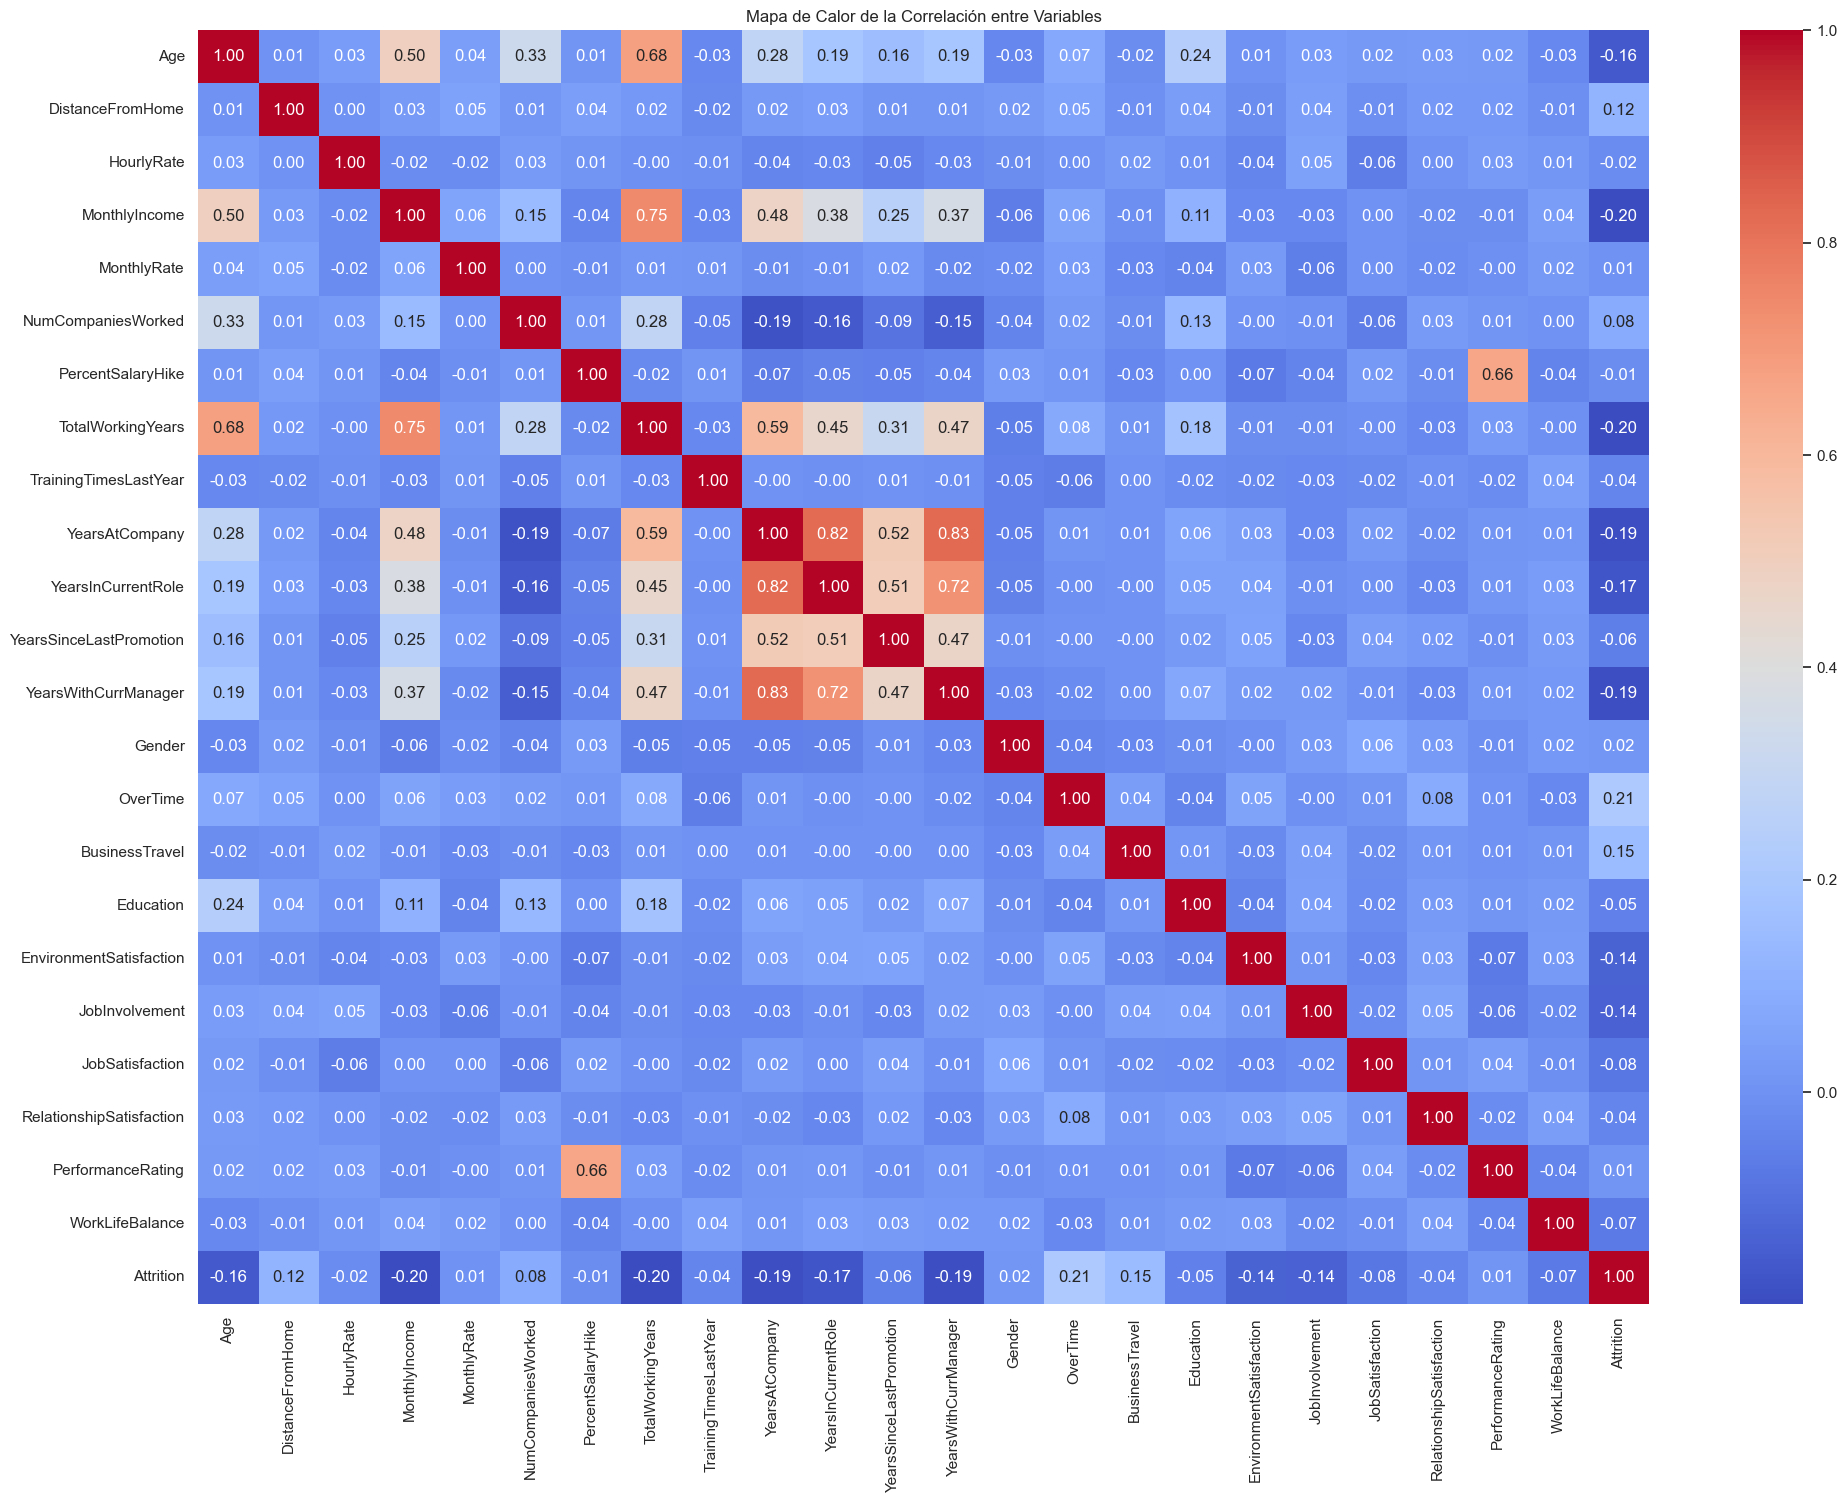

7. Obtener la matriz de correlación de los factores obtenidos hasta el momento. Debes incluir la variable “Attrition”.
	Indica las correlaciones positivas “fuertes” entre pares de factores que encuentres dentro de la matriz.
	Existen un par de correlaciones positivas, entre ellas:
		YearsInCurrentRole y YearsAtCompany
		YearsWithCurrManager y YearsAtCompany
		YearsWithCurrManager y YearsInCurrentRole
		TotalWorkingYears y MonthlyIncome
	Indica las correlaciones negativas “fuertes” entre pares de factores que encuentres dentro de la matriz.
	No existe una correlación fuerte negativa, solo debiles.


In [309]:
dfTemp = XtrainT.copy()
dfTemp['Attrition'] = ytrainT  
matriz_correlacion = dfTemp.corr()

plt.figure(figsize=(11.7 * 2, 8.27 * 2))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

printResponse("7. Obtener la matriz de correlación de los factores obtenidos hasta el momento. Debes incluir la variable “Attrition”.")
printResponse("\tIndica las correlaciones positivas “fuertes” entre pares de factores que encuentres dentro de la matriz.")
print("\tExisten un par de correlaciones positivas, entre ellas:")
print("\t\tYearsInCurrentRole y YearsAtCompany")
print("\t\tYearsWithCurrManager y YearsAtCompany")
print("\t\tYearsWithCurrManager y YearsInCurrentRole")
print("\t\tTotalWorkingYears y MonthlyIncome")
printResponse("\tIndica las correlaciones negativas “fuertes” entre pares de factores que encuentres dentro de la matriz.")
print("\tNo existe una correlación fuerte negativa, solo debiles.")


8) Aplica la transformación get_dummies() de Pandas a las variables nominales, evitando el filtrado de información y usando el argumento “drop_first” para generar “k-1” variables “dummies”, de las “k” que cada variable.

In [310]:
nominalColumns = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

tempXtrain = Xtrain[nominalColumns].copy()
tempXval = Xval[nominalColumns].copy()
tempXtest = Xtest[nominalColumns].copy()


#pd.merge(XtrainT.copy(), pd.get_dummies(tempXtrain['EducationField'], prefix='{}_'.format('EducationField'), drop_first=True), left_index=True, right_index=True)


for col in nominalColumns:
    XtrainT = pd.merge(XtrainT.copy(), pd.get_dummies(tempXtrain[col], prefix='{}_'.format(col), drop_first=True), left_index=True, right_index=True)
    XvalT = pd.merge(XvalT.copy(), pd.get_dummies(tempXval[col], prefix='{}_'.format(col), drop_first=True), left_index=True, right_index=True)
    XtestT = pd.merge(XtestT.copy(), pd.get_dummies(tempXtest[col], prefix='{}_'.format(col), drop_first=True), left_index=True, right_index=True)


XvalT


,Age,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,OverTime,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,PerformanceRating,WorkLifeBalance,Department__Research & Development,Department__Sales,EducationField__Life Sciences,EducationField__Marketing,EducationField__Medical,EducationField__Other,EducationField__Technical Degree,JobRole__Human Resources,JobRole__Laboratory Technician,JobRole__Manager,JobRole__Manufacturing Director,JobRole__Research Director,JobRole__Research Scientist,JobRole__Sales Executive,JobRole__Sales Representative,MaritalStatus__Married,MaritalStatus__Single
278,4.645465,0.703809,45.868488,4.440818,2616.090688,0.672345,0.711499,2.602118,3.850156,2.175255,2.291344,0.569533,1.991707,0,0,2.0,3,3,3,2,1,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
531,5.038069,1.429381,24.099655,4.552369,2057.352088,1.304742,0.706625,3.442957,3.850156,2.342707,2.771130,1.201333,2.745861,0,0,1.0,2,3,3,4,4,3,3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
905,4.849657,0.703809,47.232326,4.620325,566.871130,1.304742,0.705173,3.256512,1.590360,2.342707,2.771130,0.569533,2.745861,0,0,1.0,3,4,2,4,2,3,2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
640,4.498976,1.667704,27.693809,4.282781,1330.490933,-0.000000,0.708962,2.602118,1.590360,1.985047,1.274610,0.948787,1.991707,1,0,0.0,1,1,2,4,4,3,2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
322,5.038069,1.125557,41.258579,4.390193,1310.154371,1.899564,0.707875,3.442957,0.000000,2.342707,2.771130,-0.000000,2.745861,0,0,1.0,4,1,4,4,3,3,2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,5.723074,2.423080,41.258579,4.545419,2046.766269,1.500222,0.701451,4.615842,1.590360,1.985047,2.005615,-0.000000,1.268694,1,1,1.0,3,4,3,1,3,3,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1012,4.976850,0.703809,29.704508,4.065432,1797.435102,0.672345,0.701451,0.766486,2.225629,0.720880,0.000000,-0.000000,0.000000,0,0,2.0,4,2,1,3,2,3,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
735,5.858543,2.031511,51.721010,4.350986,1539.826119,1.046967,0.703470,4.735603,0.000000,1.169364,1.274610,0.809825,1.268694,1,0,1.0,3,1,2,3,4,3,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
186,5.480645,1.667704,27.693809,4.649527,913.374937,0.672345,0.705173,4.962848,1.590360,3.630687,2.978328,1.263092,3.136953,0,0,1.0,1,4,3,3,2,3,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


9) Usa la instrucción XtrainT.head().T, para desplegar los primeros registros de tus datos de entrenamiento con todas las transformaciones realizadas hasta ahora.
    - Despliega las dimensiones de los conjuntos XtrainT, XvalT y XtestT.

**NOTA:** Hasta aquí, los nombres de tus variables deben seguir siendo los mismos: XtrainT, XvalT, XtestT, ytrainT, yvalT, ytestT.
    

In [311]:
XtrainT.head().T

,813,166,23,36,52
Age,5.429337,5.530959,4.260526,5.945202,5.676342
DistanceFromHome,1.125557,2.875728,2.948524,1.429381,0.703809
HourlyRate,45.868488,32.669349,51.275919,46.778640,41.724248
MonthlyIncome,4.568769,4.220614,4.038008,4.243010,4.406760
MonthlyRate,1577.015483,707.344946,2050.086247,613.912140,637.618597
NumCompaniesWorked,1.899564,1.500222,0.672345,0.672345,1.657105
PercentSalaryHike,0.699023,0.701451,0.705173,0.705173,0.712164
TotalWorkingYears,4.962848,3.938012,0.000000,1.700699,3.256512
TrainingTimesLastYear,2.805044,1.590360,3.850156,1.590360,1.590360
YearsAtCompany,3.490528,2.628209,0.000000,1.500202,1.764294


In [312]:
print("XtrainT: {}".format(XtrainT.shape))
print("XtestT: {}".format(XtestT.shape))
print("XvalT: {}".format(XvalT.shape))

XtrainT: (1028, 40)
XtestT: (221, 40)
XvalT: (221, 40)


### PARTE 2: Análisis exploratorio entre factores
10. Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. A a manera de ejemplos, veamos solo algunas de dichas relaciones gráficamente y que pueden aportar información al problema que enfrentamos.
    - Las variables “Age” y “Attrition”.
    - Las variables “Department” y “Attrition”.
    - Las variables “Gender” y “Attrition”.
    - Incluye alguna otra relación o relaciones que consideres relevantes.
    - Con base a los gráficos obtenidos incluye tus conclusiones al respecto.

**NOTA:** Puedes seleccionar el tipo de gráfico que consideres más adecuado. En particular te
puedes apoyar en la librearía de seaborn. A manera de ejemplo puedes ver:
https://seaborn.pydata.org/generated/seaborn.countplot.html

Text(0.5, 1.0, 'Age')

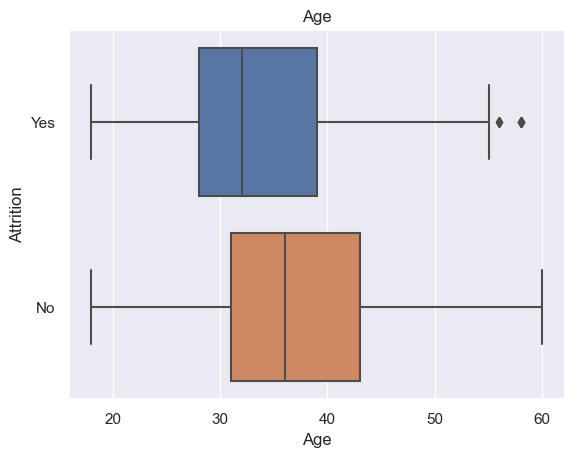

In [313]:
sns.boxplot(data=df, x="Age", y="Attrition").set_title("Age")

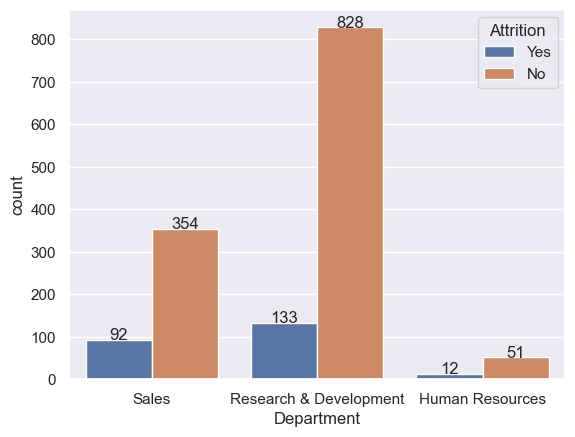

In [314]:
ax = sns.countplot(data=df, x="Department", hue="Attrition")
for p in ax.patches:
    height = p.get_height()
    ax.text( x = p.get_x()+(p.get_width()/2), 
        y = height + 0.1,
        s = '{:.0f}'.format(height), 
        ha = 'center') 

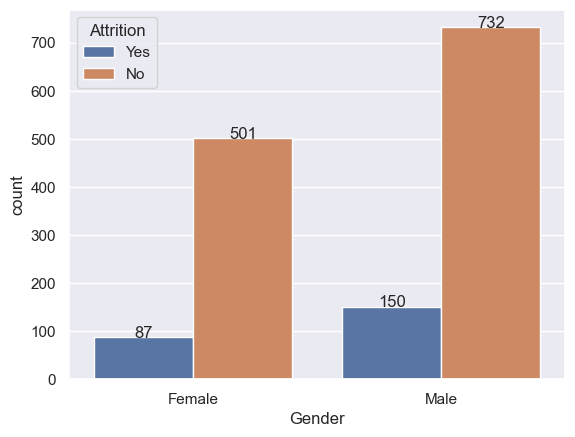

In [315]:
ax = sns.countplot(data=df, x="Gender", hue="Attrition")
for p in ax.patches:
    height = p.get_height()
    ax.text( x = p.get_x()+(p.get_width()/2), 
        y = height + 0.1,
        s = '{:.0f}'.format(height), 
        ha = 'center') 

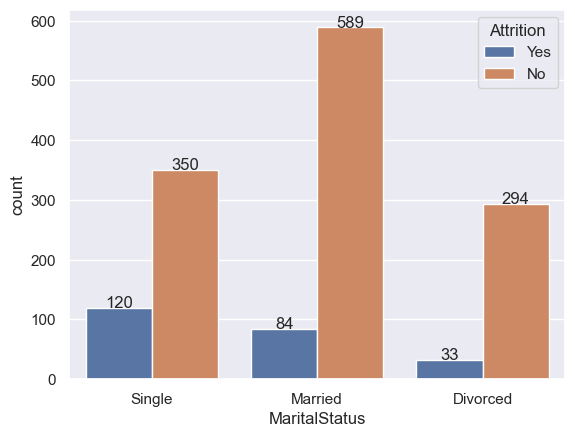

In [316]:
#sns.boxplot(data=df, y="MaritalStatus", x="Attrition")
ax = sns.countplot(data=df, x="MaritalStatus", hue="Attrition")
for p in ax.patches:
    height = p.get_height()
    ax.text( x = p.get_x()+(p.get_width()/2), 
        y = height + 0.1,
        s = '{:.0f}'.format(height), 
        ha = 'center') 

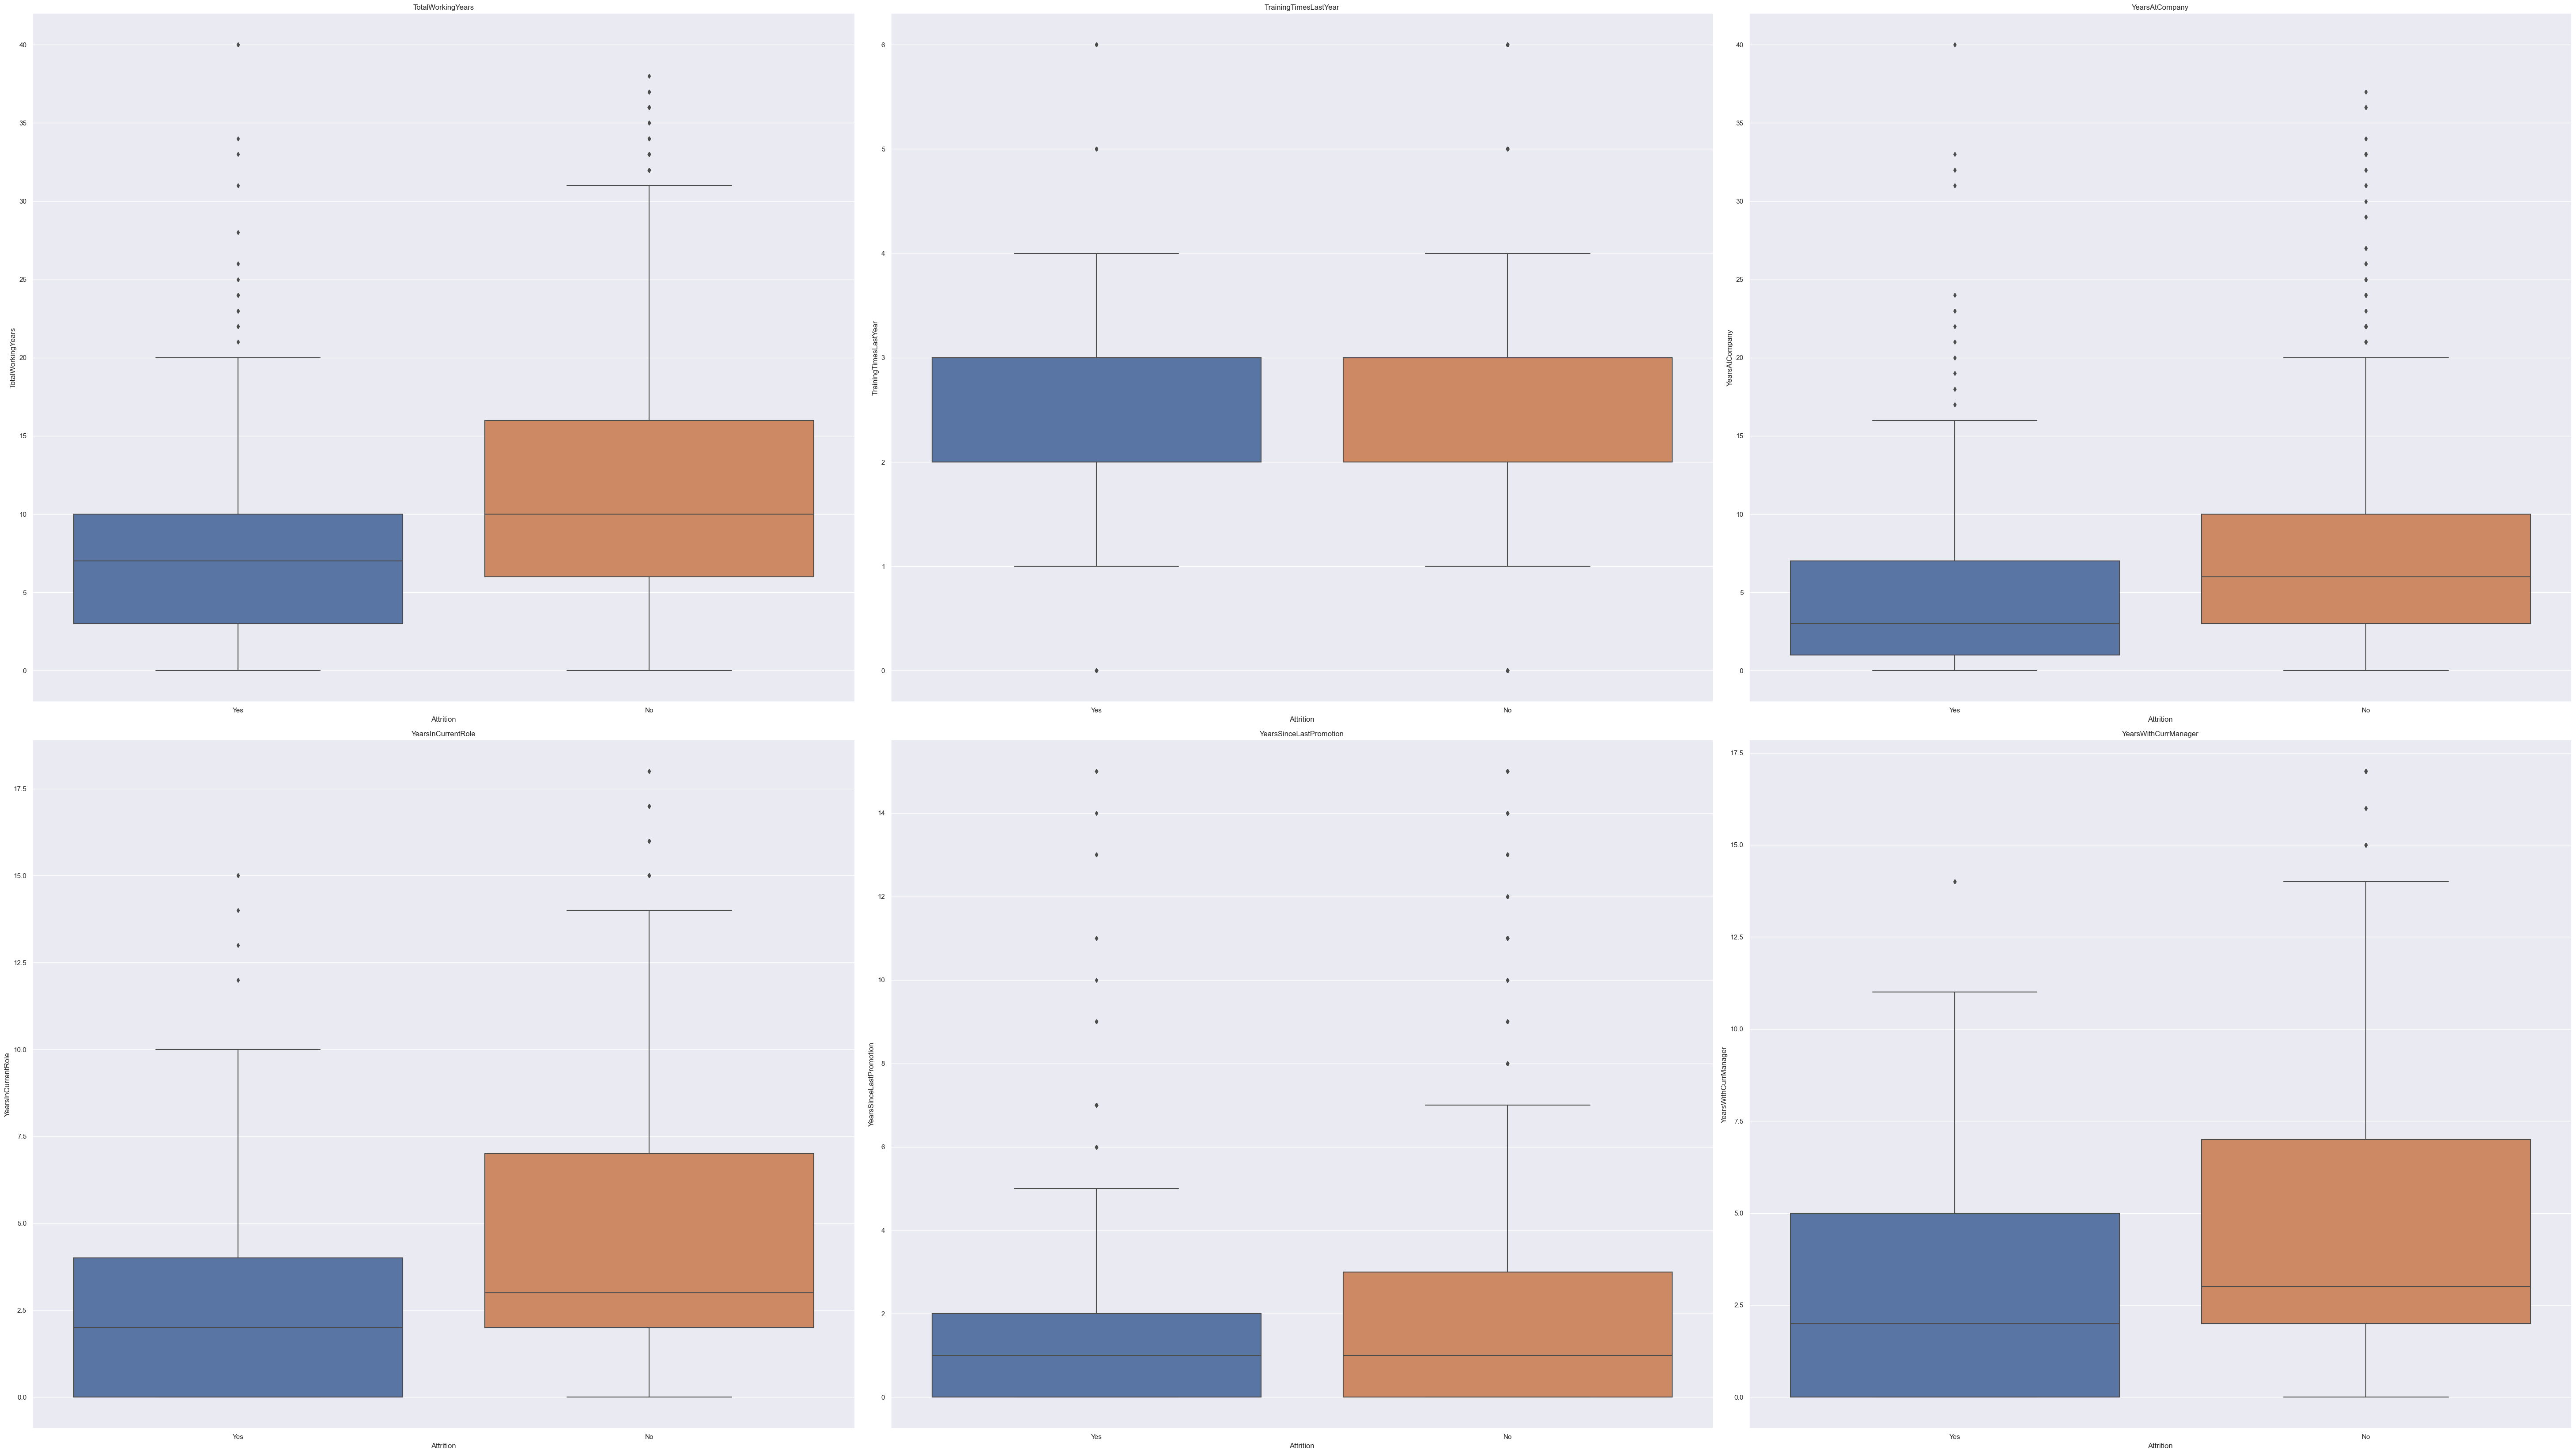

In [317]:

'''
#sns.boxplot(data=df, y="Age", x="Attrition")
catColumns = df.drop(labels=['Attrition'],axis=1).select_dtypes(exclude='number').columns.to_series()
numCols = len(catColumns)
fig, axes = plt.subplots(int(np.ceil(numCols/3)), 3, figsize=(11.7 * 5, 8.27 * math.ceil(11/4)))
row = 0
column = 0

for col in catColumns:
    ax = sns.countplot(data=df, x=col, hue="Attrition", ax=axes[row, column])
    column = column + 1
    if column == 3:
        row = row + 1
        column = 0
    for p in ax.patches:
        height = p.get_height()
        ax.text( x = p.get_x()+(p.get_width()/2), 
            y = height + 0.1,
            s = '{:.0f}'.format(height), 
            ha = 'center') 
fig.tight_layout()
'''

#sns.boxplot(data=df, y="Age", x="Attrition")
columns = df.select_dtypes(include='number').columns.to_series().filter(like='Year')
numCols = len(columns)
fig, axes = plt.subplots(int(np.ceil(numCols/3)), 3, figsize=(11.7 * 5, 8.27 * math.ceil(11/3)))
row = 0
column = 0

for col in columns:
    sns.boxplot(data=df, y=col, x="Attrition", ax=axes[row, column]).set_title(col)
    #axes[row, column].set_xticklabels(axes[row, column].get_xticklabels(), rotation=40, ha="right")
    column = column + 1
    if column == 3:
        row = row + 1
        column = 0

fig.tight_layout()

Text(0.5, 1.0, 'MonthlyIncome')

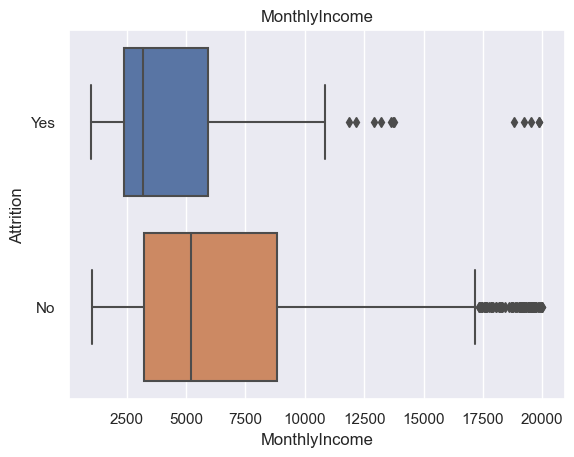

In [318]:
sns.boxplot(data=df, x="MonthlyIncome", y="Attrition").set_title("MonthlyIncome")

In [319]:
printResponse("Con base a los gráficos obtenidos incluye tus conclusiones al respecto.")
print("A partir de las graficas expuestas, no hay diferencias muy grandes en la edad pero podemos ver una tendencia en que la gente que se va de la empresa tiende a ser más joven que la que se queda.")
print("También podemos ver que entre los departamentos el departamento de Investigación y Desarrollo es el tiene una mayor tendencia en irse.")
print("Otro detalle a tomar en cuenta es que los hombres tienen una mayor tendencia a irse de la empresa.")
print("Uno de los descubrimientos más importantes que hay una concentración de gente que se va que tiene poco tiempo en la empresa o en su puesto o con su 'manager' actual.")
print("El último descubrimiento importante es que la gente que se va de la empresa suele ganar en general, menos que los que si se quedan.")



Con base a los gráficos obtenidos incluye tus conclusiones al respecto.
A partir de las graficas expuestas, no hay diferencias muy grandes en la edad pero podemos ver una tendencia en que la gente que se va de la empresa tiende a ser más joven que la que se queda.
También podemos ver que entre los departamentos el departamento de Investigación y Desarrollo es el tiene una mayor tendencia en irse.
Otro detalle a tomar en cuenta es que los hombres tienen una mayor tendencia a irse de la empresa.
Uno de los descubrimientos más importantes que hay una concentración de gente que se va que tiene poco tiempo en la empresa o en su puesto o con su 'manager' actual.
El último descubrimiento importante es que la gente que se va de la empresa suele ganar en general, menos que los que si se quedan.


### PARTE 3: Modelado
11. Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no
sobreentrenado de regresión logística usando la función LogisticRegression() de sklearn.
    - Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
    - Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
    - Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.
    - ¿Consideras que tenemos un problema desbalanceado? Justifica tu respuesta.
    - Interpreta el valor numérico de la “precision” de la clase positiva.
    - Interpreta el valor numérico del “recall” de la clase positiva.
    - Con base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.

In [320]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import classification_report

logRegression = LogisticRegression(max_iter=10000)
logRegression.fit(XtrainT, ytrainT)

y_pred = logRegression.predict(XvalT)


printResponse("\tDespliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.")
precision = precision_score(yvalT, y_pred)
print("Precision:", precision)

printResponse("\tUtiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.")
conf_matrix = confusion_matrix(yvalT, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

target_names = ['No Attrition (0)', 'Attrition (1)']
print(classification_report(yvalT, y_pred, target_names=target_names))

printResponse("\tCon base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.")
print("\t El modelo se encuentra subentrenado debido a que de los reportes podemos ver que para la variable positiva (gente que se va de la empresa) el modelo solo predijo el 47% correctamente")


printResponse("\t¿Consideras que tenemos un problema desbalanceado? Justifica tu respuesta.")
print("\tSi, considero que hay un desbalanceo de la clase positiva debido a la gráfica que se mostró en el punto 5, y lo volvemos a ver aquí, donde el modelo batalla en poder predecir la variable positiva")

printResponse("\tInterpreta el valor numérico de la “precision” de la clase positiva.")
print("\tDe todos los empleados que el modelo predijo que saldrían de la empresa (Attrition), solo el 78% en verdad lo hizo")

printResponse("\tInterpreta el valor numérico del “recall” de la clase positiva.")
print("\tDe los empleados que se fueron de la empresa (Attrition) el modelo solo predijo este resultado correctamente el 47%")

printResponse("\tCon base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.")
print("\tLas dos métricas van de la mano, pero si tuviera que escoger en base entre precision o recall, escogería recall para que fuera disminuido, ya que para el problema nos interesa aumentar el porcentaje de predicciones positivas correctas")

	Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
Precision: 0.782608695652174
	Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
Matriz de Confusión:
 [[178   5]
 [ 20  18]]
                  precision    recall  f1-score   support

No Attrition (0)       0.90      0.97      0.93       183
   Attrition (1)       0.78      0.47      0.59        38

        accuracy                           0.89       221
       macro avg       0.84      0.72      0.76       221
    weighted avg       0.88      0.89      0.88       221

	Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.
	 El modelo se encuentra subentrenado debido a que de los reportes podemos ver que para la variable positiva (gente que se va de la empresa) el modelo solo predijo el 47% correctamente
	¿

12. Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los vecinos más cercanos kNN, usando la función KNeighborsClassifier() de sklearn.
    - Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
    - Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
    - Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.
    - Interpreta el valor numérico de la “precision” de la clase positiva.
    - Interpreta el valor numérico del “recall” de la clase positiva.
    - Compara los resultados con los del modelo de Regresión Logística y escribe tus conclusiones.

c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWa

Confusion Matrix:
[[183   0]
 [ 38   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       183
           1       0.00      0.00      0.00        38

    accuracy                           0.83       221
   macro avg       0.41      0.50      0.45       221
weighted avg       0.69      0.83      0.75       221



c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Text(0, 0.5, 'Accuracy')

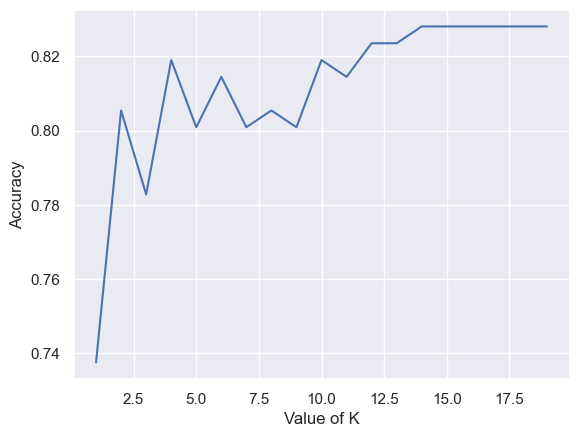

In [321]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

range_k = range(1,20)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(XtrainT, ytrainT)
   y_pred = classifier.predict(XvalT.values)
   scores[k] = metrics.accuracy_score(yvalT,y_pred)
   scores_list.append(metrics.accuracy_score(yvalT,y_pred))
result = metrics.confusion_matrix(yvalT, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(yvalT, y_pred)
print("Classification Report:",)
print (result1)

import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [322]:
from sklearn.neighbors import KNeighborsClassifier

knnClass = KNeighborsClassifier(n_neighbors=14)
knnClass.fit(XtrainT, ytrainT)

y_KNNPred = knnClass.predict(XvalT.values)


printResponse("Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.")
precisionKNN = precision_score(yvalT, y_KNNPred)
print("Precision:", precisionKNN)

printResponse("Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.")
conf_matrixKNN = confusion_matrix(yvalT, y_KNNPred)
print("Matriz de Confusión:\n", conf_matrixKNN)

target_names = ['No Attrition (0)', 'Attrition (1)']
print(classification_report(yvalT, y_KNNPred, target_names=target_names))

printResponse("Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.")
print("Parece ser que en este caso, el modelo fue sobre entrenado a predecir valores negativos, lo podemos observar con el reporte, no fue capaz de encontrar valores de la clase positiva y si regresamos a la grafica del punto 5 podemos ver que hace match con el porcentaje de 83%")

printResponse("Interpreta el valor numérico de la “precision” de la clase positiva.")
print("No se pudo encontrar ningún valor de la clase positiva")

printResponse("Interpreta el valor numérico del “recall” de la clase positiva.")
print("Igual que el anterior, al no poder predecir una variable positiva, no existe un recall")

printResponse("Compara los resultados con los del modelo de Regresión Logística y escribe tus conclusiones.")
print("Parece ser que el modelo de KNN no fue el modelo adecuado para el caso ya que sobre adapto a solo predecir la clase negativa, el cual no era el objetivo. Esto se puede deber al gran desbalanceo entre la clase positiva y negativa que hace que el modelo tenga un sesgo absoluto a la clase negativa.")


Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
Precision: 0.0
Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
Matriz de Confusión:
 [[183   0]
 [ 38   0]]
                  precision    recall  f1-score   support

No Attrition (0)       0.83      1.00      0.91       183
   Attrition (1)       0.00      0.00      0.00        38

        accuracy                           0.83       221
       macro avg       0.41      0.50      0.45       221
    weighted avg       0.69      0.83      0.75       221

Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.
Parece ser que en este caso, el modelo fue sobre entrenado a predecir valores negativos, lo podemos observar con el reporte, no fue capaz de encontrar valores de la clase positiva y si regresamos a la gra

c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. U

### PARTE 4: Balanceo de Clases
13. Utiliza el argumento “class_weight” de la función LogisticRegression() de sklearn y los valores de los hiperparámetros que consideres más adecuados para obtener un modelo no sobreentrenado.
    - Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
    - Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
    - Compara los resultados con los modelos anteriores y escribe tus conclusiones.

In [323]:
from sklearn.model_selection import GridSearchCV

gridWeights = [
     {0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0},
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0},
     {0:200,1:1.0}, {0:150,1:1.0}, {0:100,1:1.0},
     {0:99,1:1.0}, {0:10,1:1.0}, {0:0.01,1:1.0},
     {0:0.01,1:10}, {0:0.01,1:100}, {0:0.001,1:1.0},
     {0:0.005,1:1.0}, {0:1.0,1:1.0}, {0:1.0,1:0.1},
     {0:10,1:0.1}, {0:100,1:0.1}, {0:10,1:0.01},
     {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, 
     {0:1.0,1:150}, {0:1.0,1:200}, {0:1.0,1:300},
     {0:1.0,1:400},{0:1.0,1:500}, {0:1.0,1:1000}, 
     {0:10,1:1000}, {0:100,1:1000}
]
hyperparam_grid = {"class_weight": gridWeights }

logGrid = LogisticRegression(random_state=13)

grid = GridSearchCV(logGrid, hyperparam_grid, scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(XtrainT, ytrainT)

print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.8292361111111112 with param: {'class_weight': {0: 200, 1: 1.0}}


c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [324]:
weights = {0: 200, 1: 1.0}
wLogRegression = LogisticRegression(max_iter=10000, class_weight=weights, random_state=10)
wLogRegression.fit(XtrainT, ytrainT)

y_Wpred = wLogRegression.predict(XvalT)

printResponse("Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.")
precision = precision_score(yvalT, y_Wpred)
print("Precision:", precision)

printResponse("Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.")
conf_matrix = confusion_matrix(yvalT, y_Wpred)
print("Matriz de Confusión:\n", conf_matrix)

target_names = ['No Attrition (0)', 'Attrition (1)']
print(classification_report(yvalT, y_Wpred, target_names=target_names))


printResponse("Compara los resultados con los modelos anteriores y escribe tus conclusiones.")
print("")

Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
Precision: 1.0
Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
Matriz de Confusión:
 [[183   0]
 [ 36   2]]
                  precision    recall  f1-score   support

No Attrition (0)       0.84      1.00      0.91       183
   Attrition (1)       1.00      0.05      0.10        38

        accuracy                           0.84       221
       macro avg       0.92      0.53      0.51       221
    weighted avg       0.86      0.84      0.77       221

Compara los resultados con los modelos anteriores y escribe tus conclusiones.



14. Utiliza el método SMOTE de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados para obtener el mejor modelo posible.
    - Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
    - Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
    - Compara los resultados con los modelos anteriores y escribe tus conclusiones.

In [325]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
XtrainTSMOTE, ytrainTSMOTE = oversample.fit_resample(XtrainT, ytrainT)

logGrid2 = LogisticRegression(random_state=13, max_iter=10000)

grid2 = GridSearchCV(logGrid2, hyperparam_grid, scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid2.fit(XtrainTSMOTE, ytrainTSMOTE)

print(f'Best score: {grid2.best_score_} with param: {grid2.best_params_}')

Best score: 0.9586574074074073 with param: {'class_weight': {0: 1000, 1: 100}}


In [326]:
weightsSMOTE = {0: 1000, 1: 100}
logRegressionSMOTE2 = LogisticRegression(max_iter=10000, class_weight=weightsSMOTE)
logRegressionSMOTE2.fit(XtrainTSMOTE, ytrainTSMOTE)

y_predSMOTE = logRegressionSMOTE2.predict(XvalT)

printResponse("\tDespliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.")
precision = precision_score(yvalT, y_predSMOTE)
print("\tPrecision:", precision)

printResponse("\tUtiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.")
conf_matrixSMOTE = confusion_matrix(yvalT, y_predSMOTE)
print("\tMatriz de Confusión:\n", conf_matrixSMOTE)

target_names = ['No Attrition (0)', 'Attrition (1)']
print(classification_report(yvalT, y_predSMOTE, target_names=target_names))

printResponse("\tCompara los resultados con los modelos anteriores y escribe tus conclusiones.")
print("\tEl modelo ha mejorado bastante gracias al uso de SMOTE, vemos como la precision en ambos lados mejoro bastante, lo único que sigue bajo es recall, pero no es del todo malo ya que lo que buscamos por el momento es la precisión")
print("\tPor otro lado el modelo es aun mejor que KNN prediciendo la variable negativa (No Attrition) por lo cual puede ser buena opción usarse el modelo para predecir este valor y llegar a la variable positiva por medio de descarte.")


	Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
	Precision: 0.8571428571428571
	Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
	Matriz de Confusión:
 [[182   1]
 [ 32   6]]
                  precision    recall  f1-score   support

No Attrition (0)       0.85      0.99      0.92       183
   Attrition (1)       0.86      0.16      0.27        38

        accuracy                           0.85       221
       macro avg       0.85      0.58      0.59       221
    weighted avg       0.85      0.85      0.81       221

	Compara los resultados con los modelos anteriores y escribe tus conclusiones.
	El modelo ha mejorado bastante gracias al uso de SMOTE, vemos como la precision en ambos lados mejoro bastante, lo único que sigue bajo es recall, pero no es del todo malo ya que lo que buscamos por el momento es la precisión
	Por otro lado el modelo es 

15. Aplica alguno de los modelos combinados de sub y sobre entrenamiento y reporta los resultados del mejor modelo que hayas obtenido. Compáralo con los anteriores e incluye tus conclusiones.


**NOTA:** https://imbalanced-learn.org/stable/references/combine.html

In [327]:
from imblearn.combine import SMOTETomek

smoteTomek = SMOTETomek(random_state=0)
XtrainTSMOTETomek, ytrainTSMOTETomek = smoteTomek.fit_resample(XtrainT, ytrainT)

printResponse("###SMOTETomek###")
printResponse("LogisticRegression")
logRegressionSMOTETomek = LogisticRegression(max_iter=10000)
logRegressionSMOTETomek.fit(XtrainTSMOTETomek, ytrainTSMOTETomek)

y_predSMOTETek = logRegressionSMOTETomek.predict(XvalT)

precision = precision_score(yvalT, y_predSMOTETek)
print("Precision:", precision)

conf_matrixSMOTETek = confusion_matrix(yvalT, y_predSMOTETek)
print("Matriz de Confusión:\n", conf_matrixSMOTETek)

target_names = ['No Attrition (0)', 'Attrition (1)']
print(classification_report(yvalT, y_predSMOTETek, target_names=target_names))

printResponse("KNeighborsClassifier")
knnClassTomek = KNeighborsClassifier(n_neighbors=14)
knnClassTomek.fit(XtrainTSMOTETomek, ytrainTSMOTETomek)

y_KNNPredTomek = knnClassTomek.predict(XvalT.values)


precisionKNNTomek = precision_score(yvalT, y_KNNPredTomek)
print("Precision:", precisionKNNTomek)
conf_matrixKNNTomek = confusion_matrix(yvalT, y_KNNPredTomek)
print("Matriz de Confusión:\n", conf_matrixKNNTomek)

target_names = ['No Attrition (0)', 'Attrition (1)']
print(classification_report(yvalT, y_KNNPredTomek, target_names=target_names))

###SMOTETomek###
LogisticRegression
Precision: 0.42105263157894735
Matriz de Confusión:
 [[161  22]
 [ 22  16]]
                  precision    recall  f1-score   support

No Attrition (0)       0.88      0.88      0.88       183
   Attrition (1)       0.42      0.42      0.42        38

        accuracy                           0.80       221
       macro avg       0.65      0.65      0.65       221
    weighted avg       0.80      0.80      0.80       221

KNeighborsClassifier
Precision: 0.13432835820895522
Matriz de Confusión:
 [[125  58]
 [ 29   9]]
                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.68      0.74       183
   Attrition (1)       0.13      0.24      0.17        38

        accuracy                           0.61       221
       macro avg       0.47      0.46      0.46       221
    weighted avg       0.70      0.61      0.64       221



c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [328]:
from imblearn.combine import SMOTEENN

smoteTEEN = SMOTEENN(random_state=0)
XtrainTSMOTETEEN, ytrainTSMOTETEEN = smoteTEEN.fit_resample(XtrainT, ytrainT)

printResponse("###SMOTEENN###")
printResponse("LogisticRegression")
logRegressionSMOTETEEN = LogisticRegression(max_iter=10000)
logRegressionSMOTETEEN.fit(XtrainTSMOTETEEN, ytrainTSMOTETEEN)

y_predSMOTETEEN = logRegressionSMOTETEEN.predict(XvalT)

precision = precision_score(yvalT, y_predSMOTETEEN)
print("Precision:", precision)

conf_matrixSMOTETEEN = confusion_matrix(yvalT, y_predSMOTETEEN)
print("Matriz de Confusión:\n", conf_matrixSMOTETEEN)

target_names = ['No Attrition (0)', 'Attrition (1)']
print(classification_report(yvalT, y_predSMOTETEEN, target_names=target_names))

printResponse("KNeighborsClassifier")
knnClassTEEN = KNeighborsClassifier(n_neighbors=14)
knnClassTEEN.fit(XtrainTSMOTETEEN, ytrainTSMOTETEEN)

y_KNNPredTEEN = knnClassTEEN.predict(XvalT.values)


precisionKNNTEEN = precision_score(yvalT, y_KNNPredTEEN)
print("Precision:", precisionKNNTEEN)
conf_matrixKNNTEEN = confusion_matrix(yvalT, y_KNNPredTEEN)
print("Matriz de Confusión:\n", conf_matrixKNNTEEN)

target_names = ['No Attrition (0)', 'Attrition (1)']
print(classification_report(yvalT, y_KNNPredTEEN, target_names=target_names))

###SMOTEENN###
LogisticRegression
Precision: 0.3620689655172414
Matriz de Confusión:
 [[146  37]
 [ 17  21]]
                  precision    recall  f1-score   support

No Attrition (0)       0.90      0.80      0.84       183
   Attrition (1)       0.36      0.55      0.44        38

        accuracy                           0.76       221
       macro avg       0.63      0.68      0.64       221
    weighted avg       0.80      0.76      0.77       221

KNeighborsClassifier
Precision: 0.1452991452991453
Matriz de Confusión:
 [[ 83 100]
 [ 21  17]]
                  precision    recall  f1-score   support

No Attrition (0)       0.80      0.45      0.58       183
   Attrition (1)       0.15      0.45      0.22        38

        accuracy                           0.45       221
       macro avg       0.47      0.45      0.40       221
    weighted avg       0.69      0.45      0.52       221



c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [329]:
gridSMOTTomek = GridSearchCV(logRegressionSMOTETomek, hyperparam_grid, scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
gridSMOTTomek.fit(XtrainTSMOTETomek, ytrainTSMOTETomek)

print(f'Best score: {gridSMOTTomek.best_score_} with param: {gridSMOTTomek.best_params_}')

Best score: 0.9560243055555554 with param: {'class_weight': {0: 1000, 1: 100}}


In [330]:
gridSMOTEEN = GridSearchCV(logRegressionSMOTETEEN, hyperparam_grid, scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
gridSMOTEEN.fit(XtrainTSMOTETEEN, ytrainTSMOTETEEN)

print(f'Best score: {gridSMOTEEN.best_score_} with param: {gridSMOTEEN.best_params_}')

Best score: 0.9566111111111111 with param: {'class_weight': {0: 1000, 1: 100}}


In [331]:
weightsSMOTETomek = {0: 1000, 1: 100}
weightsSMOTEEN = {0: 1000, 1: 100}

printResponse("###SMOTETomek###")
printResponse("LogisticRegression")
logRegressionSMOTETomek2 = LogisticRegression(max_iter=10000, class_weight=weightsSMOTETomek)
logRegressionSMOTETomek2.fit(XtrainTSMOTETomek, ytrainTSMOTETomek)

y_predSMOTETek2 = logRegressionSMOTETomek2.predict(XvalT)

precision = precision_score(yvalT, y_predSMOTETek2)
print("Precision:", precision)

conf_matrixSMOTETek2 = confusion_matrix(yvalT, y_predSMOTETek2)
print("Matriz de Confusión:\n", conf_matrixSMOTETek2)
print(classification_report(yvalT, y_predSMOTETek2, target_names=target_names))



printResponse("###SMOTEENN###")
printResponse("LogisticRegression")
logRegressionSMOTETEEN2 = LogisticRegression(max_iter=10000, class_weight=weightsSMOTEEN)
logRegressionSMOTETEEN2.fit(XtrainTSMOTETEEN, ytrainTSMOTETEEN)

y_predSMOTETEEN2 = logRegressionSMOTETEEN2.predict(XvalT)

precision = precision_score(yvalT, y_predSMOTETEEN2)
print("Precision:", precision)

conf_matrixSMOTETEEN2 = confusion_matrix(yvalT, y_predSMOTETEEN2)
print("Matriz de Confusión:\n", conf_matrixSMOTETEEN2)
print(classification_report(yvalT, y_predSMOTETEEN2, target_names=target_names))

printResponse("15. Aplica alguno de los modelos combinados de sub y sobre entrenamiento y reporta los resultados del mejor modelo que hayas obtenido. Compáralo con los anteriores e incluye tus conclusiones.")
print("En conclusión, los modelos de sobre y sub entrenamiento nos muestran mas maneras de optimizar los valores de precision y recall, en este caso, SMOTETomek ha sido el cual ha brindado una mejor mejora en estas métricas y es el que ha brindado la mejor precisión hasta el momento.")

###SMOTETomek###
LogisticRegression
Precision: 0.875
Matriz de Confusión:
 [[182   1]
 [ 31   7]]
                  precision    recall  f1-score   support

No Attrition (0)       0.85      0.99      0.92       183
   Attrition (1)       0.88      0.18      0.30        38

        accuracy                           0.86       221
       macro avg       0.86      0.59      0.61       221
    weighted avg       0.86      0.86      0.81       221

###SMOTEENN###
LogisticRegression
Precision: 0.5555555555555556
Matriz de Confusión:
 [[175   8]
 [ 28  10]]
                  precision    recall  f1-score   support

No Attrition (0)       0.86      0.96      0.91       183
   Attrition (1)       0.56      0.26      0.36        38

        accuracy                           0.84       221
       macro avg       0.71      0.61      0.63       221
    weighted avg       0.81      0.84      0.81       221

15. Aplica alguno de los modelos combinados de sub y sobre entrenamiento y reporta los resu

### PARTE 5: La importancia de los factores
16. Con base al mejor modelo de regresión logística obtenido hasta ahora, utiliza la magnitud de los coeficientes como métrica para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.
    - Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).
    - ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?
    - ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?

¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?
Los principales factores que influyen el que el empleado abandone el trabajo son: 
PercentSalaryHike
Overtime
MonthlyIncome
¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?
Los principales factores que influyen el que el empleado se quede en el trabajo son: 
Si pertenece a recursos humanos
Si su rol es de manager
Y si su campod e estudio fue otra indole
Como esos campos son de valores nominales, tambien quiero resaltar que de los factores numericos: EnvironmentSatisfaction y JobInvolvement


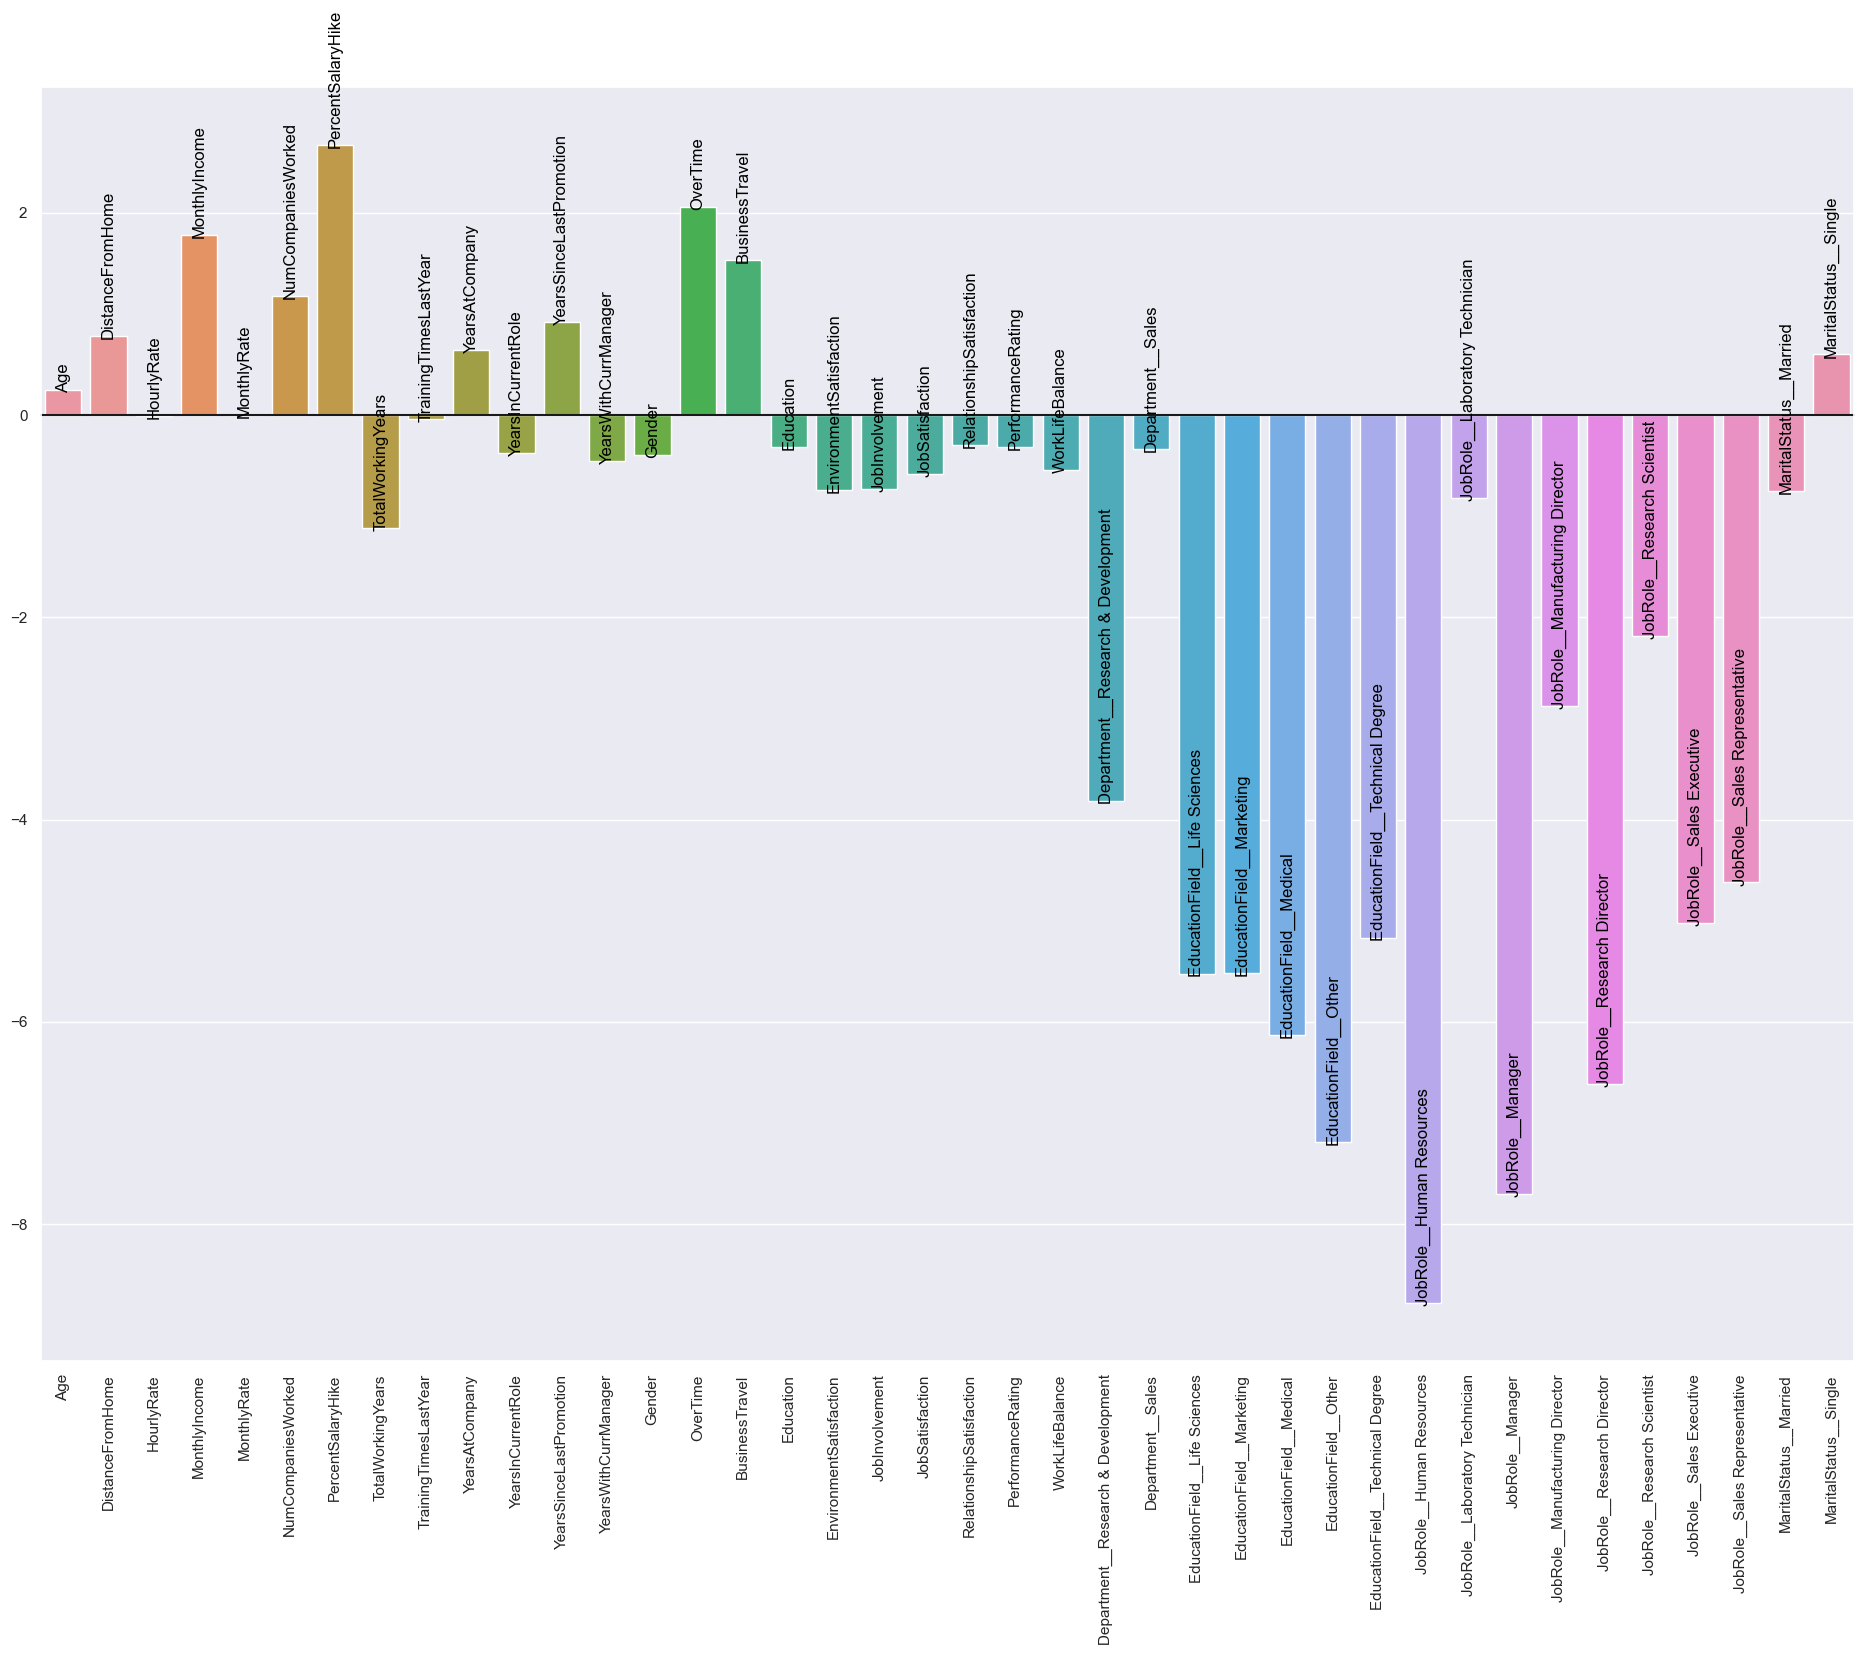

In [332]:
coefficients = logRegressionSMOTETomek2.coef_[0]
columns = XtrainT.columns.tolist()

dfCoefficients = pd.DataFrame(data=[coefficients], columns=columns)

plt.figure(figsize=(11.7 * 2, 8.27 * 2))

ax = sns.barplot(x=columns, y=coefficients)
i = 0
for col in columns:
    ax.text(i, coefficients[i], col,
            color='black', ha='center', rotation='vertical')
    i = i + 1

ax.axhline(0, color="k", clip_on=False)
ax.tick_params(axis='x', rotation=90)

printResponse("¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?")
print("Los principales factores que influyen el que el empleado abandone el trabajo son: ")
print("PercentSalaryHike")
print("Overtime")
print("MonthlyIncome")
printResponse("¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?")
print("Los principales factores que influyen el que el empleado se quede en el trabajo son: ")
print("Si pertenece a recursos humanos")
print("Si su rol es de manager")
print("Y si su campod e estudio fue otra indole")
print("Como esos campos son de valores nominales, tambien quiero resaltar que de los factores numericos: EnvironmentSatisfaction y JobInvolvement")


17) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN, aplica la técnica de permutación de los factores con el método “permutation_importance()” de sklearn, y con la métrica “f1_weighted” del argumento “scoring” para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.
    - Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).
    - ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?
    - ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?
    - Compara los resultados con el ejercicio anterior e incluye tus comentarios. En particular, comenta cuál método te da los mejores factores que tienen mayor impacto en el problema de rotación de personal.

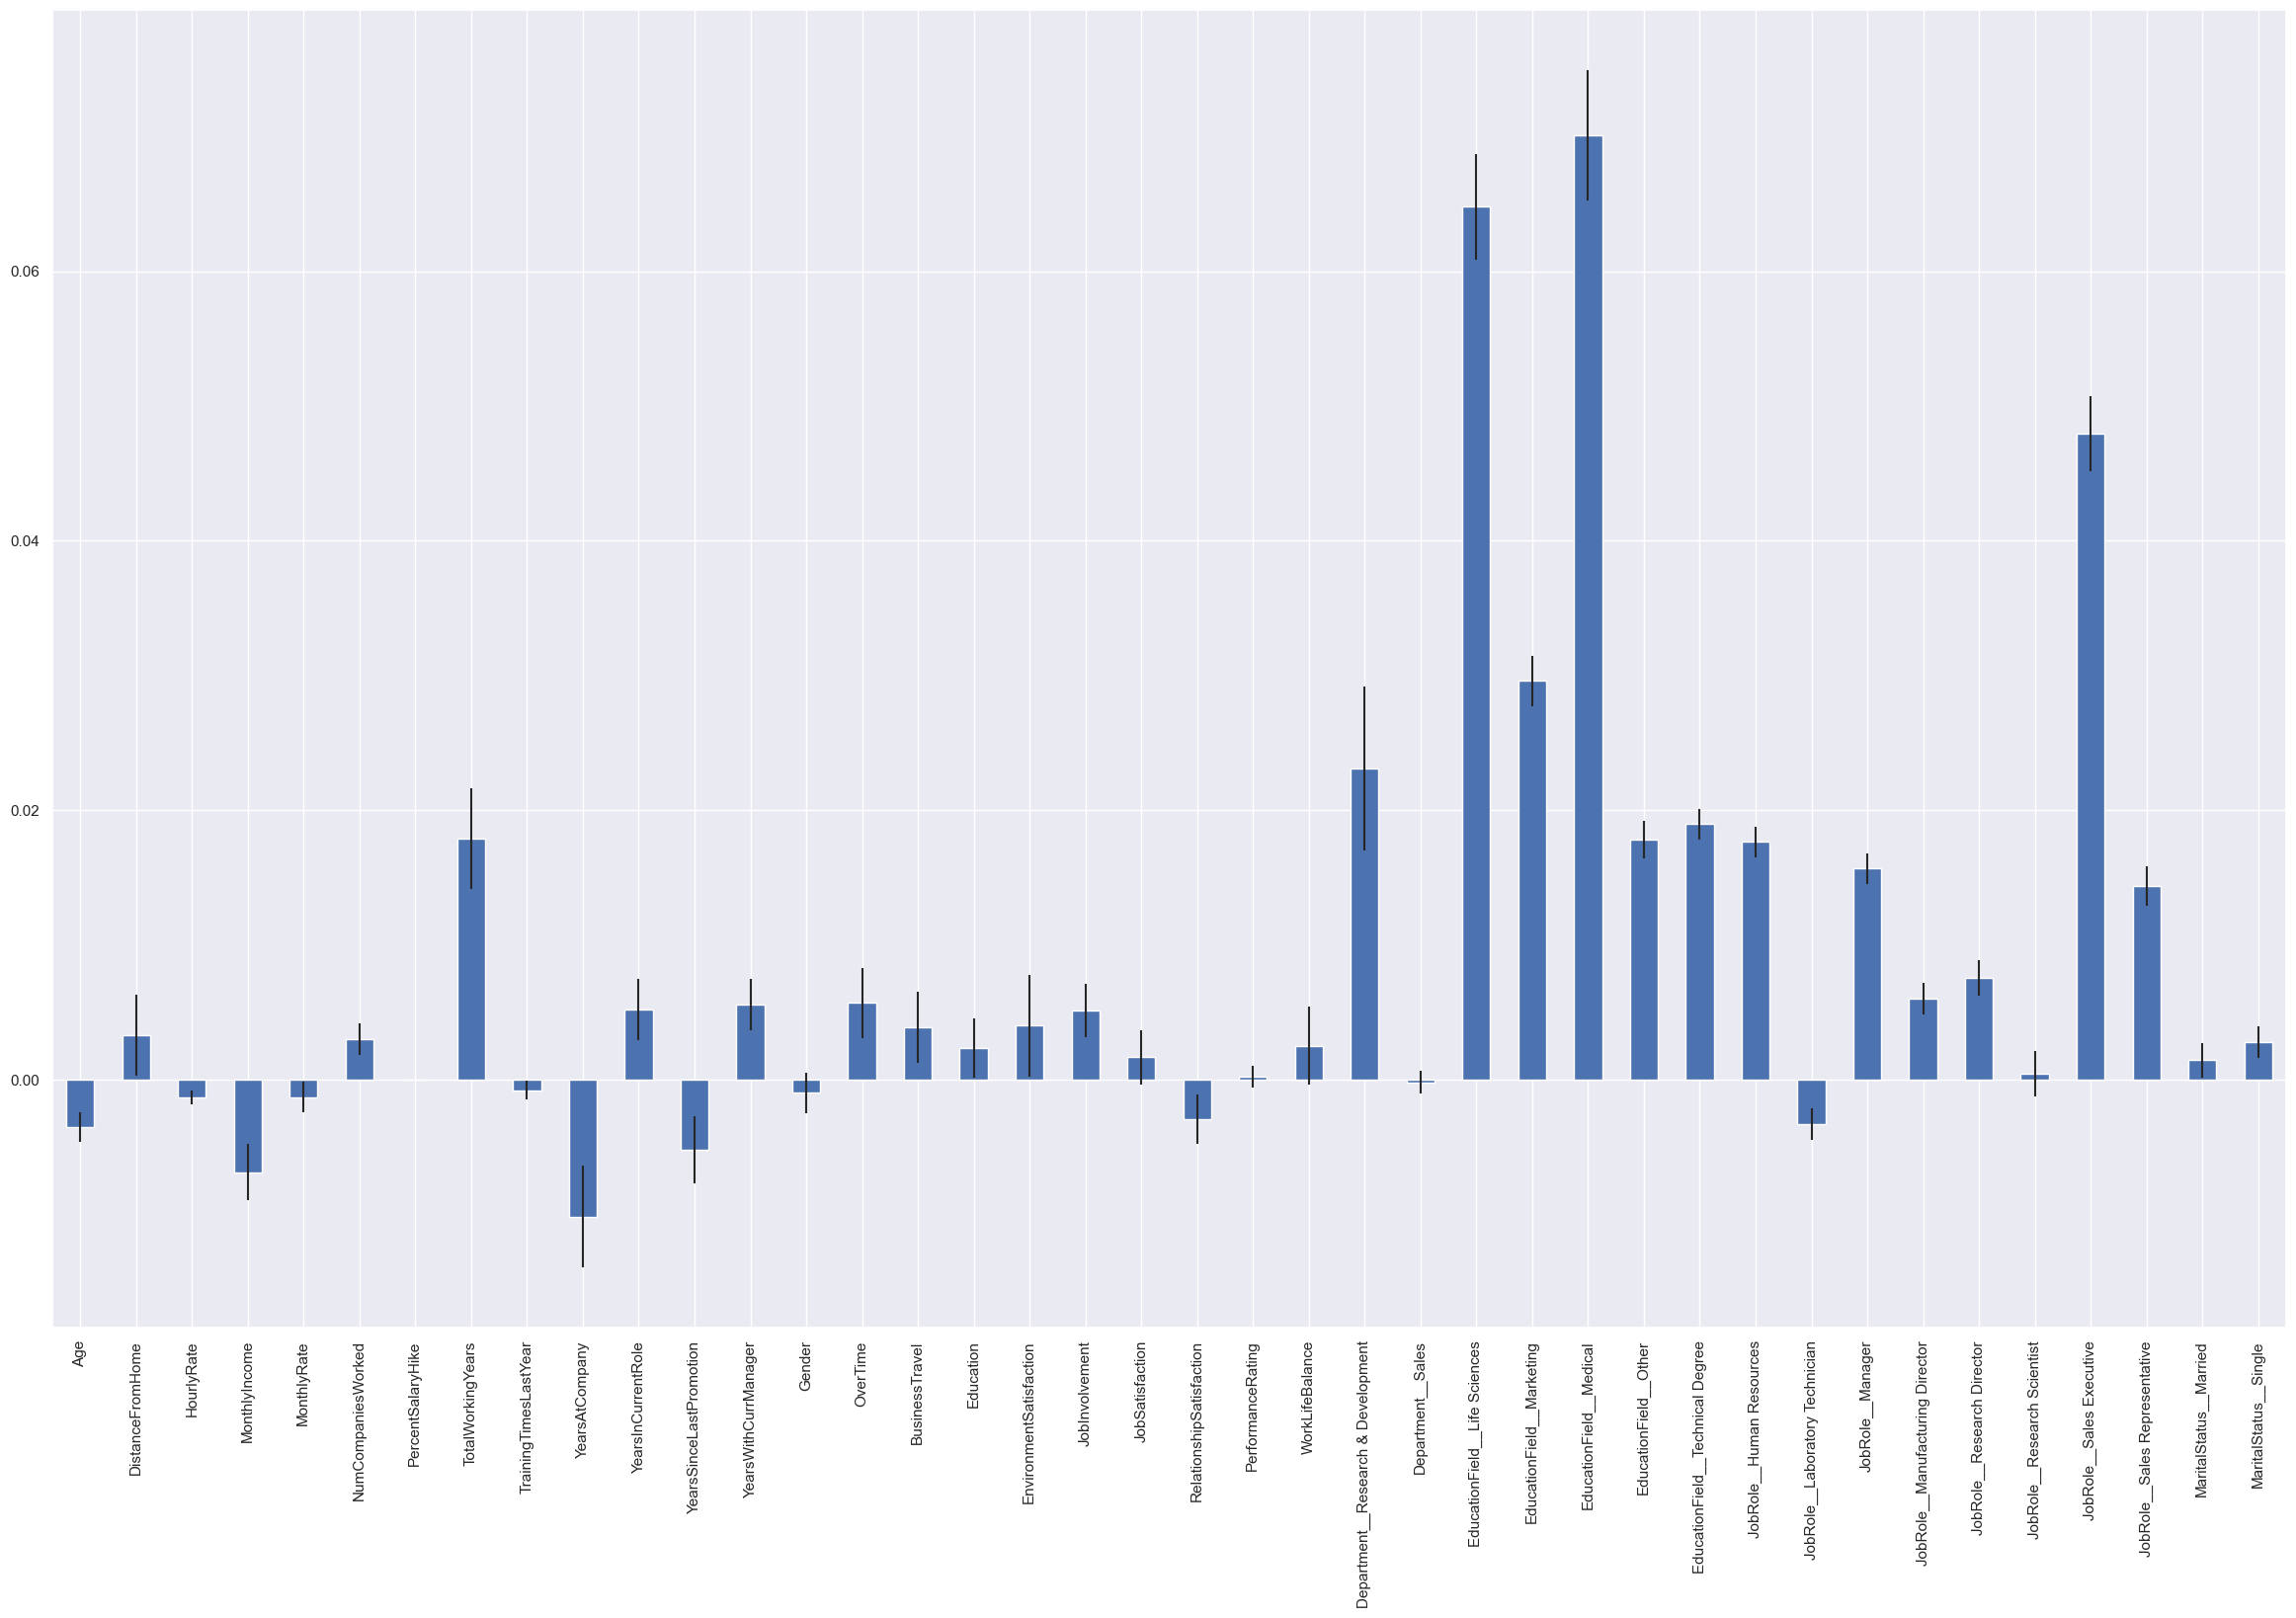

¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?
Con esta nueva grafica, podemos ver que de los campos de años en la empresa, salario mensual y años desde la ultima promoción de puesto son los que influencian más el 'attrition'
¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?
Según la gráfica, podemos observar que es la gente con educación medicina y ciencias de la vida son los factores principales para no abandonar, al igual que la gente que trabaja en ventas.
Del lado de los valores númericos podemos observar que entre mayor cantidad de años en trabajando en total, menos probable que la gente se retire del trabajo
Compara los resultados con el ejercicio anterior e incluye tus comentarios. En particular, comenta cuál método te da los mejores factores que tienen mayor impacto en el problema de rotación de personal.
Ambos resultados muestran resultad

In [333]:
from sklearn.inspection import permutation_importance

result = permutation_importance(logRegressionSMOTETomek2, XtrainTSMOTETomek, ytrainTSMOTETomek, n_repeats=10, random_state=0, scoring='f1_weighted')

importances = pd.Series(result.importances_mean, index=columns)

fig, ax = plt.subplots(figsize=(11.7 * 2, 8.27 * 2))
importances.plot.bar(yerr=result.importances_std, ax=ax)
fig.tight_layout()
plt.show()

printResponse("¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?")
print("Con esta nueva grafica, podemos ver que de los campos de años en la empresa, salario mensual y años desde la ultima promoción de puesto son los que influencian más el 'attrition'")
printResponse("¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?")
print("Según la gráfica, podemos observar que es la gente con educación medicina y ciencias de la vida son los factores principales para no abandonar, al igual que la gente que trabaja en ventas.")
print("Del lado de los valores númericos podemos observar que entre mayor cantidad de años en trabajando en total, menos probable que la gente se retire del trabajo")
printResponse("Compara los resultados con el ejercicio anterior e incluye tus comentarios. En particular, comenta cuál método te da los mejores factores que tienen mayor impacto en el problema de rotación de personal.")
print("Ambos resultados muestran resultados mixtos, pero en general podemos concluir que los años en la empresa y el salario mensual suelen ser los factores principales para el abandono de los empleados.")
print("En mi opinión permutation_importance da mejores resultados debido a que el scoring hecho con el f1_weighted resalta la importancia de la efectividad del modelo y además según lo investigado, la permutación tiene menos probabilidades de omitir alguna variable.")
    

18. Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN y de los factores de mayor impacto que encontraste en el inciso anterior, utiliza la clase SelectFromModel de sklearn para reducir la cantidad de factores del problema y volver a entrenar el modelo con los datos de entrenamiento y validación, de manera que el desempeño con esta cantidad de datos reducida sea aproximadamente la obtenida previamente con todos los factores. Recuerda evitar el filtrado de información del conjunto de entrenamiento a los conjuntos de validación y de prueba.
    - ¿A cuántos factores pudiste reducir el problema? Indica cuántos tenías y a cuántos se redujo, así como el porcentaje de reducción de factores.
    - Despliega la matriz de confusión y el reporte dado por la función classification_report().

In [334]:
from sklearn.feature_selection import SelectFromModel

featureNames = XtrainTSMOTETomek.columns
bestWeight = {}
bestScore = 0
selectedFeatures = []
for thresh in np.arange(2.283830572848596, 0.0, -0.1):

    selector = SelectFromModel(estimator=logRegressionSMOTETomek2, threshold=thresh).fit(XtrainTSMOTETomek, ytrainTSMOTETomek)
    print(f"Features selected by SelectFromModel: { featureNames[selector.get_support()]}")


    selectedFeaturesTemp = featureNames[selector.get_support()]

    XselectedFeaturesTrain = XtrainTSMOTETomek[selectedFeaturesTemp].copy()
    XselectedFeaturesValidation = XvalT[selectedFeaturesTemp].copy()
    XselectedFeaturesTest = XtestT[selectedFeaturesTemp].copy()


    logSelectedGrid = LogisticRegression(max_iter=10000)
    logSelectedGrid.fit(XselectedFeaturesTrain, ytrainTSMOTETomek)

    gridSelectedGrid = GridSearchCV(logSelectedGrid, hyperparam_grid, scoring="f1_weighted", cv=100, n_jobs=-1, refit=True)
    gridSelectedGrid.fit(XselectedFeaturesTrain, ytrainTSMOTETomek)

    logRegressionSFM = LogisticRegression(max_iter=10000, class_weight=gridSelectedGrid.best_params_["class_weight"])
    logRegressionSFM.fit(XselectedFeaturesTrain, ytrainTSMOTETomek)

    y_predSFM = logRegressionSFM.predict(XselectedFeaturesValidation)

    precision = precision_score(yvalT, y_predSFM)
    print(f'Precision: {precision}')

    if (bestScore < precision):
        bestScore = precision
        bestWeight = gridSelectedGrid.best_params_["class_weight"]
        
        selectedFeatures = selectedFeaturesTemp

Features selected by SelectFromModel: Index(['PercentSalaryHike', 'Department__Research & Development',
       'EducationField__Life Sciences', 'EducationField__Marketing',
       'EducationField__Medical', 'EducationField__Other',
       'EducationField__Technical Degree', 'JobRole__Human Resources',
       'JobRole__Manager', 'JobRole__Manufacturing Director',
       'JobRole__Research Director', 'JobRole__Sales Executive',
       'JobRole__Sales Representative'],
      dtype='object')


c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
Features selected by SelectFromModel: Index(['PercentSalaryHike', 'Department__Research & Development',
       'EducationField__Life Sciences', 'EducationField__Marketing',
       'EducationField__Medical', 'EducationField__Other',
       'EducationField__Technical Degree', 'JobRole__Human Resources',
       'JobRole__Manager', 'JobRole__Manufacturing Director',
       'JobRole__Research Director', 'JobRole__Research Scientist',
       'JobRole__Sales Executive', 'JobRole__Sales Representative'],
      dtype='object')


c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
Features selected by SelectFromModel: Index(['PercentSalaryHike', 'Department__Research & Development',
       'EducationField__Life Sciences', 'EducationField__Marketing',
       'EducationField__Medical', 'EducationField__Other',
       'EducationField__Technical Degree', 'JobRole__Human Resources',
       'JobRole__Manager', 'JobRole__Manufacturing Director',
       'JobRole__Research Director', 'JobRole__Research Scientist',
       'JobRole__Sales Executive', 'JobRole__Sales Representative'],
      dtype='object')


c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
Features selected by SelectFromModel: Index(['PercentSalaryHike', 'OverTime', 'Department__Research & Development',
       'EducationField__Life Sciences', 'EducationField__Marketing',
       'EducationField__Medical', 'EducationField__Other',
       'EducationField__Technical Degree', 'JobRole__Human Resources',
       'JobRole__Manager', 'JobRole__Manufacturing Director',
       'JobRole__Research Director', 'JobRole__Research Scientist',
       'JobRole__Sales Executive', 'JobRole__Sales Representative'],
      dtype='object')
Precision: 0.35714285714285715
Features selected by SelectFromModel: Index(['PercentSalaryHike', 'OverTime', 'Department__Research & Development',
       'EducationField__Life Sciences', 'EducationField__Marketing',
       'EducationField__Medical', 'EducationField__Other',
       'EducationField__Technical Degree', 'JobRole__Human Resources',
       'JobRole__Manager', 'JobRole__Manufacturing Director',
       'JobRole__Research Director', 'Job

In [335]:
printResponse("¿A cuántos factores pudiste reducir el problema? Indica cuántos tenías y a cuántos se redujo, así como el porcentaje de reducción de factores.")
print("Se tenian 40 pero se redujeron a 31, se redujo en un 22.5% la reduccion de factores")
printResponse("Despliega la matriz de confusión y el reporte dado por la función classification_report().")
XselectedFeaturesTrain = XtrainTSMOTETomek[selectedFeatures].copy()
XselectedFeaturesValidation = XvalT[selectedFeatures].copy()
XselectedFeaturesTest = XtestT[selectedFeatures].copy()

logRegressionSFM = LogisticRegression(max_iter=10000, class_weight=bestWeight)
logRegressionSFM.fit(XselectedFeaturesTrain, ytrainTSMOTETomek)

y_predSFM = logRegressionSFM.predict(XselectedFeaturesValidation)

precision = precision_score(yvalT, y_predSFM)
print("Precision:", precision)

conf_matrixSFM = confusion_matrix(yvalT, y_predSFM)
print("Matriz de Confusión:\n", conf_matrixSFM)
print(classification_report(yvalT, y_predSFM, target_names=target_names))

¿A cuántos factores pudiste reducir el problema? Indica cuántos tenías y a cuántos se redujo, así como el porcentaje de reducción de factores.
Se tenian 40 pero se redujeron a 31, se redujo en un 22.5% la reduccion de factores
Despliega la matriz de confusión y el reporte dado por la función classification_report().
Precision: 0.4857142857142857
Matriz de Confusión:
 [[165  18]
 [ 21  17]]
                  precision    recall  f1-score   support

No Attrition (0)       0.89      0.90      0.89       183
   Attrition (1)       0.49      0.45      0.47        38

        accuracy                           0.82       221
       macro avg       0.69      0.67      0.68       221
    weighted avg       0.82      0.82      0.82       221



### PARTE 6: Modelo final y conclusiones
19. Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal a partir de los datos históricos iniciales.
    - Forma un nuevo conjunto de Entrenamiento con los mejores conjuntos de entrenamiento y validación que hayas obtenido hasta ahora.
    - Selecciona el mejor modelo de aprendizaje automático que hayas obtenido hasta ahora, entre regresión logística y kNN. Explica por qué lo consideras el mejor modelo.
    - Entrena el modelo con el nuevo conjunto de entrenamiento aumentado y utiliza el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo. Para ello:
        1. Despliega la exactitud (accuracy) del conjunto de entrenamiento y del conjunto de Prueba para verificar que no esté sub o sobre entrenado.
        2. Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.
        3. Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.

In [336]:
from sklearn.metrics import accuracy_score

X_BestFeaturesTrain = XselectedFeaturesTrain.append(XselectedFeaturesValidation)
y_BestFeaturesTrain = np.concatenate((ytrainTSMOTETomek, yvalT))
X_BestFeaturesTest = XselectedFeaturesTest


printResponse("Selecciona el mejor modelo de aprendizaje automático que hayas obtenido hasta ahora, entre regresión logística y kNN. Explica por qué lo consideras el mejor modelo.")
print("Seleccioné el LogisticRegression debido a que es el que mejor precisión ha tenido de las dos variables entre los que se han trabajado con la menor cantidad de features.")
print("Además, el KNN no fue tan apropiado para su uso debido a que tiende muy rápido a sobre entrenarse.")

logRegressionBest = LogisticRegression(max_iter=10000, class_weight=bestWeight)
logRegressionBest.fit(X_BestFeaturesTrain, y_BestFeaturesTrain)

y_predTrain = logRegressionBest.predict(X_BestFeaturesTrain)
y_predBest = logRegressionBest.predict(X_BestFeaturesTest)

printResponse("i. Despliega la exactitud (accuracy) del conjunto de entrenamiento y del conjunto de Prueba para verificar que no esté sub o sobre entrenado.")
accuracyTrain = accuracy_score(y_BestFeaturesTrain, y_predTrain)
accuracyTest = accuracy_score(ytestT, y_predBest)
print("Accuracy - Train:", accuracyTrain)
print("Accuracy - Test:", accuracyTest)

printResponse("ii. Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.")

conf_matrixBest = confusion_matrix(ytestT, y_predBest)
print("Matriz de Confusión:\n", conf_matrixBest)
print(classification_report(ytestT, y_predBest, target_names=target_names))


printResponse("iii. Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.")
print("Con base en la rotación del personal podemos concluir que por su naturaleza tiende a ser un problema poco balanceado dado a que es un problema donde la rotación es la minoría.")
print("Esto ocasiona que tengamos que usar soluciones que ayuden a este imbalance como lo que vimos de SMOTE y SMOTETomek.")
print("Podemos concluir que el modelo final es un bueno ya que no esta sobre entrenado para la ocasión, cuenta con un alto valor de precisión de 90% para no attrition, de los cuales el 93% de estas personas, podemos predecir el 93% de estas personas y el f1 score al ser de 0.91 es un gran modelo ya que el valor deseado es lo más cercano a  1")
print("Por otro lado, el modelo no funciona del todo bien para predecir 'Attrition' ya que este cuenta con una precision muy baja del 57% y del total que abandono la empresa solo pudo predecir el 47% y su f1 score es del 0.52 que es algo mediocre.")
print("Con este modelo podemos pivotear el acercamiento al problema y predecir la rotación por medio de descarte al predecir correctamente a los que no van a rotar.")
print("")

Selecciona el mejor modelo de aprendizaje automático que hayas obtenido hasta ahora, entre regresión logística y kNN. Explica por qué lo consideras el mejor modelo.
Seleccioné el LogisticRegression debido a que es el que mejor precisión ha tenido de las dos variables entre los que se han trabajado con la menor cantidad de features.
Además, el KNN no fue tan apropiado para su uso debido a que tiende muy rápido a sobre entrenarse.
i. Despliega la exactitud (accuracy) del conjunto de entrenamiento y del conjunto de Prueba para verificar que no esté sub o sobre entrenado.
Accuracy - Train: 0.9016838674633352
Accuracy - Test: 0.8552036199095022
ii. Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.
Matriz de Confusión:
 [[172  13]
 [ 19  17]]
                  precision    recall  f1-score   support

No Attrition (0)       0.90      0.93      0.91       185
   Attrition (1)       0.57      0.47      0.52        36

        accur

C:\Users\carlo\AppData\Local\Temp\ipykernel_6972\4287936597.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_BestFeaturesTrain = XselectedFeaturesTrain.append(XselectedFeaturesValidation)
